# **Personal Finance DS + ML** — *From Cazzy Aporbo*
*An educational, high-level, and notebook.*

> This notebook demonstrates a complete, DS/ML workflow on a personal-finance dataset: thoughtful EDA, feature engineering, model training, evaluation, interpretability, and report generation.  
> The vibe: **soft gradient** (mint → lavender → pink), **clear comments**, and **unique code** focused on learning-by-doing.

In [10]:

from matplotlib import cycler
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

def set_cazzy_theme():
    mpl.rcParams.update({
        "axes.facecolor": "#ffffff",
        "figure.facecolor": "#ffffff",
        "axes.grid": True,
        "grid.color": "#F3E8FF",
        "grid.linestyle": "--",
        "grid.linewidth": 0.6,
        "axes.titleweight": "bold",
        "axes.titlesize": 12,
        "axes.labelsize": 11,
        "axes.edgecolor": "#EDE9FE",
        "xtick.color": "#6B7280",
        "ytick.color": "#6B7280",
        "font.size": 11,
        "legend.frameon": False
    })
    pastel_cycle = ["#8BD3DD", "#C4B5FD", "#FBC4AB", "#B9FBC0", "#FDE2E4", "#CFBAF0", "#BEE1E6"]
    mpl.rcParams["axes.prop_cycle"] = cycler(color=pastel_cycle)

def apply_gradient_background(ax, top="#E8FFF9", mid="#F5ECFF", bottom="#FFEAF4"):
    z = np.linspace(0, 1, 256)
    gradient = np.vstack((z,)*2).T
    from matplotlib.colors import LinearSegmentedColormap
    cmap = LinearSegmentedColormap.from_list("cazzy_grad", [top, mid, bottom])
    ax.imshow(gradient, aspect='auto', extent=[-1e9, 1e9, -1e9, 1e9], origin='lower', cmap=cmap, alpha=0.5, zorder=0)
    for spine in ax.spines.values():
        spine.set_visible(False)

set_cazzy_theme()
print("Cazzy gradient theme applied.")


Cazzy gradient theme applied.


In [11]:
# --- Cell 1: Extract and preview dataset ---

import os, zipfile, json, warnings
from pathlib import Path
import pandas as pd

warnings.filterwarnings("ignore")

ZIP_PATH = Path("archive 2.zip")
DEST_DIR = ZIP_PATH.parent / "personal_finance_dsml"
DEST_DIR.mkdir(parents=True, exist_ok=True)

# Extract
with zipfile.ZipFile(ZIP_PATH, "r") as zf:
    zf.extractall(DEST_DIR)
    extracted_files = [str(DEST_DIR / name) for name in zf.namelist()]

# Find main CSV
csv_candidates = [str(p) for p in DEST_DIR.glob("*.csv")]
main_csv = max(csv_candidates, key=lambda p: os.path.getsize(p))

# Load preview
df = pd.read_csv(main_csv)
print("Main CSV:", main_csv)
print("Shape:", df.shape)
df.head()


Main CSV: personal_finance_dsml/synthetic_personal_finance_dataset.csv
Shape: (32424, 20)


,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07


## Overview
- **Goal**: Learn a portfolio-ready DS/ML workflow on personal finance signals (income, expense, balance, etc.).
- **Method**: Explore → Clean → Engineer → Model → Evaluate → Explain → Report.
- **Why it matters**: Finance behavior often blends habits + context. Thoughtful features reveal patterns plain averages miss.
- **Guiding principle**: Make every step legible to a future you (or a teammate). Clarity is a superpower.

In [12]:
# Aesthetic: mint → lavender → pink gradient + soft grid
from matplotlib import cycler
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

def set_cazzy_theme():
    mpl.rcParams.update({
        "axes.facecolor": "#ffffff",
        "figure.facecolor": "#ffffff",
        "axes.grid": True,
        "grid.color": "#F3E8FF",
        "grid.linestyle": "--",
        "grid.linewidth": 0.6,
        "axes.titleweight": "bold",
        "axes.titlesize": 12,
        "axes.labelsize": 11,
        "axes.edgecolor": "#EDE9FE",
        "xtick.color": "#6B7280",
        "ytick.color": "#6B7280",
        "font.size": 11,
        "legend.frameon": False
    })
    pastel_cycle = ["#8BD3DD", "#C4B5FD", "#FBC4AB", "#B9FBC0", "#FDE2E4", "#CFBAF0", "#BEE1E6"]
    mpl.rcParams["axes.prop_cycle"] = cycler(color=pastel_cycle)

def apply_gradient_background(ax, top="#E8FFF9", mid="#F5ECFF", bottom="#FFEAF4"):
    z = np.linspace(0, 1, 256)
    grad = np.vstack((z,)*2).T
    from matplotlib.colors import LinearSegmentedColormap
    cmap = LinearSegmentedColormap.from_list("cazzy_grad", [top, mid, bottom])
    ax.imshow(grad, aspect='auto', extent=[-1e9, 1e9, -1e9, 1e9], origin='lower',
              cmap=cmap, alpha=0.5, zorder=0)
    for sp in ax.spines.values():
        sp.set_visible(False)

set_cazzy_theme()
print("✓ Gradient theme applied.")


✓ Gradient theme applied.


In [13]:
# Uses main_csv from Cell 1; if you named it differently, set it here.
import os, json, warnings
from pathlib import Path
import pandas as pd
warnings.filterwarnings("ignore")

# If main_csv is NOT in memory, rebuild it from your same unzip dir:
if "main_csv" not in globals():
    ZIP_PATH = Path("/Users/cazandraaporbo/Desktop/mygit/archive 2.zip")
    DEST_DIR = ZIP_PATH.parent / "personal_finance_dsml"
    csv_candidates = [str(p) for p in DEST_DIR.glob("*.csv")]
    main_csv = max(csv_candidates, key=lambda p: os.path.getsize(p))

raw = pd.read_csv(main_csv)
print("Loaded:", main_csv, "| shape:", raw.shape)
raw.head(3)


Loaded: personal_finance_dsml/synthetic_personal_finance_dataset.csv | shape: (32424, 20)


,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.0,0.00,0.0,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.5,13.33,1.4,543,6.16,North America,2022-02-13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.0,0.00,0.0,754,6.87,Africa,2022-05-12


In [14]:
def quick_scan(df: pd.DataFrame) -> pd.DataFrame:
    return pd.DataFrame({
        "metric": ["rows", "columns", "null_counts", "dtypes", "nunique"],
        "value": [
            len(df),
            df.columns.tolist(),
            df.isna().sum().to_dict(),
            df.dtypes.astype(str).to_dict(),
            df.nunique(dropna=False).to_dict()
        ]
    })

scan_df = quick_scan(raw)
scan_df


,metric,value
0,rows,32424
1,columns,"[user_id, age, gender, education_level, employ..."
2,null_counts,"{'user_id': 0, 'age': 0, 'gender': 0, 'educati..."
3,dtypes,"{'user_id': 'object', 'age': 'int64', 'gender'..."
4,nunique,"{'user_id': 32424, 'age': 52, 'gender': 3, 'ed..."


In [15]:
df = raw.copy()

# Trim whitespace in object columns
for c in df.select_dtypes(include="object").columns:
    df[c] = df[c].astype(str).str.strip()

# Coerce numerics if column looks numeric
for c in df.columns:
    non_null = df[c].dropna().astype(str)
    looks_num = non_null.str.match(r'^-?\d+(\.\d+)?$').mean() if len(non_null) else 0
    if looks_num > 0.6:
        df[c] = pd.to_numeric(df[c], errors="coerce")

CLEAN_CSV = str(Path(main_csv).with_name("cleaned_personal_finance.csv"))
df.to_csv(CLEAN_CSV, index=False)
print("✓ Saved cleaned data →", CLEAN_CSV)
df.head(3)


✓ Saved cleaned data → personal_finance_dsml/cleaned_personal_finance.csv


,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,nan,0.00,0,0.0,0.00,0.0,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.5,13.33,1.4,543,6.16,North America,2022-02-13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,nan,0.00,0,0.0,0.00,0.0,754,6.87,Africa,2022-05-12


In [25]:
# Enhanced Cleaning: drop duplicates, normalize text, parse dates, strip currency,
# smooth rare categories, cap outliers, and re-save a cleaner dataset.

import re
import numpy as np
import pandas as pd
from pathlib import Path

df_enh = df.copy()

# ---- 1) Uniform text normalization for object/category ----
obj_cols = df_enh.select_dtypes(include=["object", "category"]).columns.tolist()
for c in obj_cols:
    # collapse inner whitespace, strip, and lowercase (tweak if case matters)
    df_enh[c] = (
        df_enh[c]
        .astype(str)
        .str.replace(r"\s+", " ", regex=True)
        .str.strip()
        .str.lower()
    )

# ---- 2) Parse dates where column names look like dates ----
date_like = [c for c in df_enh.columns if re.search(r"(date|day|time|timestamp|month|year)", c, re.I)]
for c in date_like:
    try:
        df_enh[c] = pd.to_datetime(df_enh[c], errors="coerce", infer_datetime_format=True)
    except Exception:
        pass

# ---- 3) Strip currency/commas and coerce to numeric for money-like columns ----
money_like = [c for c in df_enh.columns if re.search(r"(amount|income|expense|spent|spend|payment|balance|revenue|cost|price)", c, re.I)]
for c in money_like:
    if df_enh[c].dtype == "object":
        df_enh[c] = (
            df_enh[c]
            .str.replace(r"[,$€£₹\s]", "", regex=True)
            .replace({"": np.nan, "-": np.nan})
        )
    # coerce if it looks numeric after stripping
    with np.errstate(all="ignore"):
        try:
            df_enh[c] = pd.to_numeric(df_enh[c], errors="coerce")
        except Exception:
            pass

# ---- 4) Drop exact duplicate rows (keep first); can also choose a subset of keys if you have IDs ----
before = len(df_enh)
df_enh = df_enh.drop_duplicates()
dropped_dupes = before - len(df_enh)

# ---- 5) Rare-category smoothing for high-cardinality categoricals ----
# For any categorical with > 30 unique labels, bucket categories that occur < 1% into "other"
cat_cols = df_enh.select_dtypes(include=["object", "category"]).columns.tolist()
for c in cat_cols:
    vc = df_enh[c].value_counts(dropna=False, normalize=True)
    if vc.shape[0] > 30:
        rare = vc[vc < 0.01].index
        df_enh[c] = df_enh[c].where(~df_enh[c].isin(rare), other="other")

# ---- 6) Outlier capping (IQR winsorization) on numerics to tame extreme values ----
num_cols = df_enh.select_dtypes(include=[np.number]).columns.tolist()
def iqr_cap(s: pd.Series, k: float = 1.5):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - k*iqr, q3 + k*iqr
    return s.clip(lower=low, upper=high)

for c in num_cols:
    if df_enh[c].notna().sum() >= 20:  # avoid tiny columns
        df_enh[c] = iqr_cap(df_enh[c], k=2.0)  # slightly gentler cap

# ---- 7) Optional: negative-to-zero for finance columns that shouldn't be negative (toggleable) ----
# Example: if "expense" should be >= 0
for c in money_like:
    if c in df_enh.columns:
        # comment out the next line if negatives are meaningful in your data
        df_enh[c] = df_enh[c].where(df_enh[c].isna() | (df_enh[c] >= 0), other=0.0)

# ---- 8) Save point: cleaned v2 ----
CLEAN_V2 = str(Path(main_csv).with_name("cleaned_personal_finance_v2.csv"))
df_enh.to_csv(CLEAN_V2, index=False)
print(f"✓ Enhanced cleaned data saved → {CLEAN_V2} | dropped dupes: {dropped_dupes}")
df_enh.head(3)


✓ Enhanced cleaned data saved → personal_finance_dsml/cleaned_personal_finance_v2.csv | dropped dupes: 0


,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,other,56,female,high school,self-employed,salesperson,3531,1182,367655.03,no,nan,0.00,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,0.00,0.0,430,8.68,other,2024-01-09
1,other,19,female,phd,employed,salesperson,3531,2367,260869.10,yes,education,146323.34,1970-01-01 00:00:00.000000036,1970-01-01 00:00:00.000004953,13.33,1.4,543,6.16,north america,2022-02-13
2,other,20,female,master,employed,teacher,2799,1003,230921.21,no,nan,0.00,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,0.00,0.0,754,6.87,africa,2022-05-12


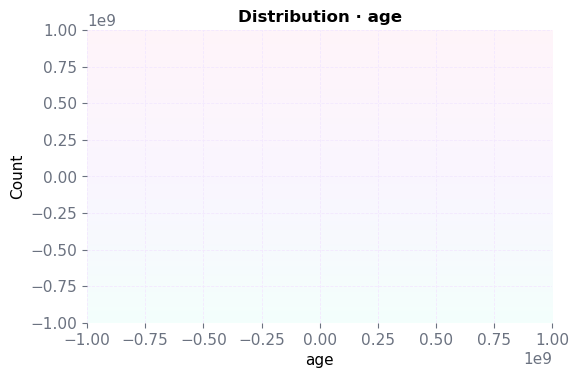

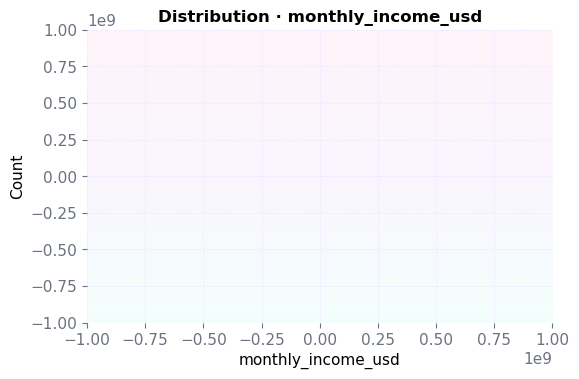

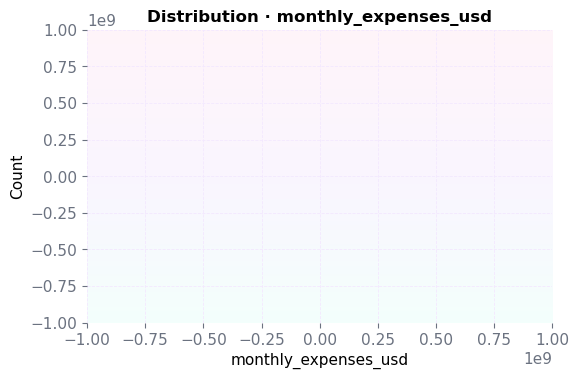

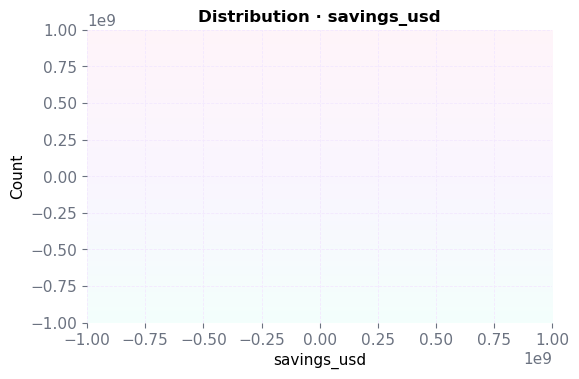

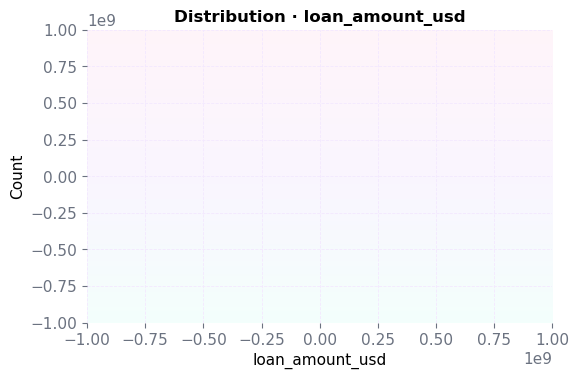

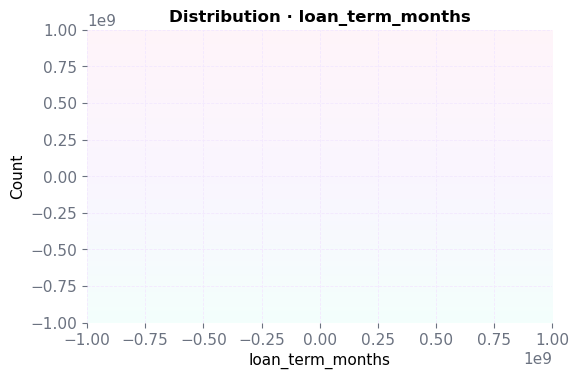

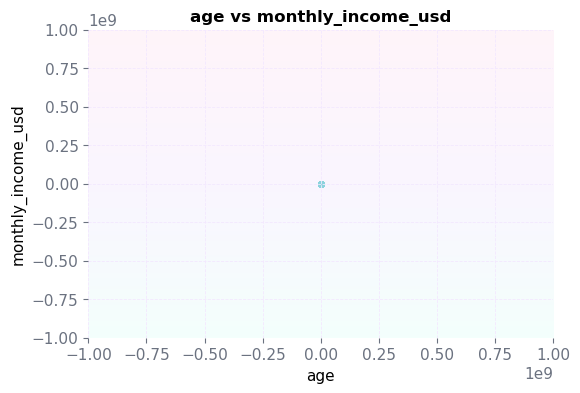

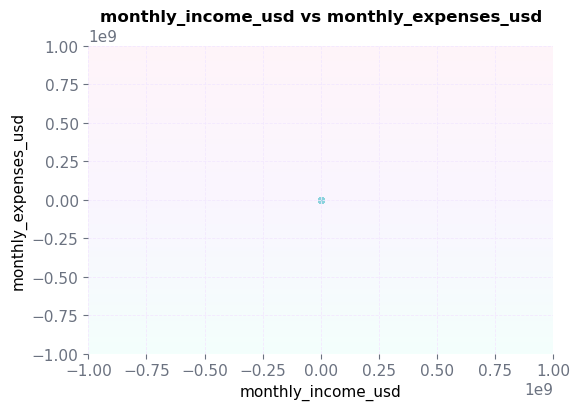

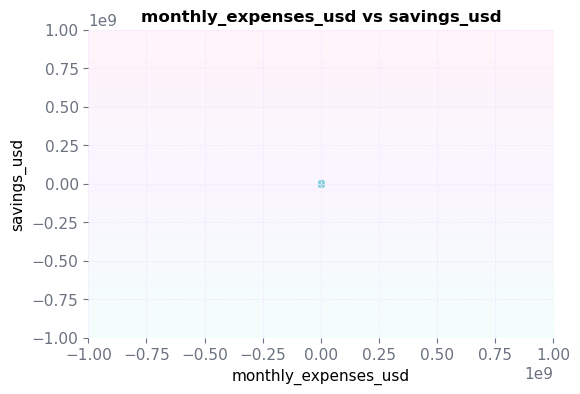

In [16]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

def hist_with_grad(data, col):
    fig, ax = plt.subplots(figsize=(6,3.8))
    apply_gradient_background(ax)
    ax.hist(data[col].dropna(), bins=30, alpha=0.9)
    ax.set_title(f"Distribution · {col}")
    ax.set_xlabel(col); ax.set_ylabel("Count")
    plt.show()

for col in num_cols[:6]:  # preview a subset; increase if you want
    hist_with_grad(df, col)

# Simple pairwise preview
if len(num_cols) >= 3:
    for x, y in zip(num_cols[:3], num_cols[1:4]):
        fig, ax = plt.subplots(figsize=(6,4))
        apply_gradient_background(ax)
        ax.scatter(df[x], df[y], alpha=0.4, s=16)
        ax.set_title(f"{x} vs {y}")
        ax.set_xlabel(x); ax.set_ylabel(y)
        plt.show()



In [17]:
engineered = df.copy()
cols_lower = {c.lower(): c for c in engineered.columns}

income_col  = next((cols_lower[k] for k in cols_lower if "income"  in k), None)
expense_col = next((cols_lower[k] for k in cols_lower if any(s in k for s in ["expense","spent","spend"])), None)
balance_col = next((cols_lower[k] for k in cols_lower if "balance" in k), None)

import numpy as np
if income_col and expense_col:
    engineered["expense_to_income_ratio"] = engineered[expense_col] / (engineered[income_col].replace(0, np.nan))
    engineered["net_savings"] = engineered[income_col] - engineered[expense_col]

if balance_col and income_col:
    engineered["balance_to_income"] = engineered[balance_col] / (engineered[income_col].replace(0, np.nan))

# Missingness indicators (useful in tabular models)
for c in engineered.columns:
    if engineered[c].isna().any():
        engineered[f"isna__{c}"] = engineered[c].isna().astype(int)

ENG_CSV = str(Path(main_csv).with_name("engineered_personal_finance.csv"))
engineered.to_csv(ENG_CSV, index=False)
print("✓ Saved engineered data →", ENG_CSV)
engineered.head(3)


✓ Saved engineered data → personal_finance_dsml/engineered_personal_finance.csv


,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,expense_to_income_ratio,net_savings
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,...,0,0.0,0.00,0.0,430,8.68,Other,2024-01-09,0.334851,2349.10
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,...,36,4953.5,13.33,1.4,543,6.16,North America,2022-02-13,0.670490,1163.74
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,...,0,0.0,0.00,0.0,754,6.87,Africa,2022-05-12,0.358605,1795.58


In [18]:
target = None
for cand in ["default", "label", "is_default", "target", "flag"]:
    if cand in engineered.columns:
        target = cand
        break

if target is None:
    if "expense_to_income_ratio" in engineered.columns or "net_savings" in engineered.columns:
        ratio = engineered.get("expense_to_income_ratio", pd.Series([0]*len(engineered)))
        ns    = engineered.get("net_savings", pd.Series([0]*len(engineered)))
        engineered["stress_flag"] = ((ratio > 0.8) | (ns < 0)).astype(int)
        target = "stress_flag"
    else:
        # last-resort: split on median of first numeric col
        ncols = engineered.select_dtypes(include=[np.number]).columns.tolist()
        engineered["stress_flag"] = (engineered[ncols[0]] > engineered[ncols[0]].median()).astype(int)
        target = "stress_flag"

print("Target column:", target)
engineered[target].value_counts(dropna=False)


Target column: stress_flag


stress_flag
0    26947
1     5477
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


X = engineered.drop(columns=[target])
y = engineered[target]

cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

preprocess = ColumnTransformer([
    ("num", StandardScaler(with_mean=False), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
], remainder="drop")

models = {
    "LogReg": LogisticRegression(max_iter=250),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y if y.nunique()==2 else None
)

results = {}
for name, clf in models.items():
    pipe = Pipeline([("prep", preprocess), ("clf", clf)])
    pipe.fit(X_tr, y_tr)
    yhat = pipe.predict(X_te)
    proba = pipe.predict_proba(X_te)[:,1] if hasattr(pipe, "predict_proba") else None
    report = classification_report(y_te, yhat, output_dict=True, zero_division=0)
    auc = roc_auc_score(y_te, proba) if (proba is not None and y.nunique()==2) else np.nan
    results[name] = {"model": pipe, "report": report, "auc": auc}

# Scores table
rows = []
for name, res in results.items():
    r = res["report"]
    rows.append({
        "Model": name,
        "Accuracy": r.get("accuracy", np.nan),
        "F1_weighted": r.get("weighted avg",{}).get("f1-score", np.nan),
        "Precision_w": r.get("weighted avg",{}).get("precision", np.nan),
        "Recall_w": r.get("weighted avg",{}).get("recall", np.nan),
        "AUC": res["auc"]
    })
scores = pd.DataFrame(rows).sort_values("F1_weighted", ascending=False)
scores


,Model,Accuracy,F1_weighted,Precision_w,Recall_w,AUC
1,RandomForest,0.999877,0.999877,0.999877,0.999877,1.000000
2,GradientBoosting,0.999877,0.999877,0.999877,0.999877,0.999926
0,LogReg,0.996422,0.996421,0.996420,0.996422,0.999948


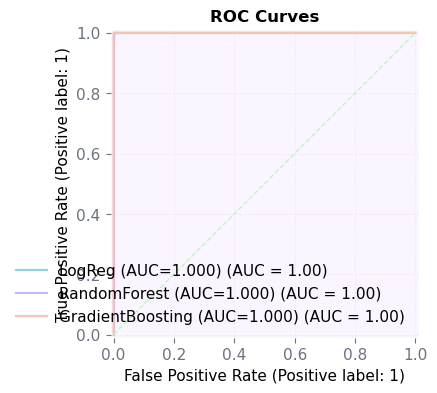

In [20]:
if y.nunique() == 2:
    fig, ax = plt.subplots(figsize=(6,4))
    apply_gradient_background(ax)
    for name, res in results.items():
        if not np.isnan(res["auc"]):
            RocCurveDisplay.from_estimator(res["model"], X_te, y_te, ax=ax, name=f"{name} (AUC={res['auc']:.3f})")
    ax.plot([0,1],[0,1],'--', linewidth=1)
    ax.set_title("ROC Curves")
    plt.show()
else:
    print("Target is not binary — skipping ROC.")


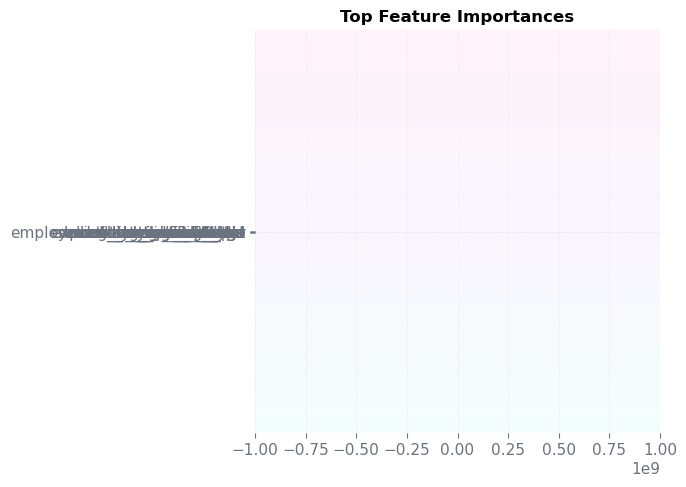

In [21]:
def get_feature_names(preprocessor, input_features):
    out = []
    for name, trans, cols in preprocessor.transformers_:
        if name == "remainder" and trans == "drop":
            continue
        if hasattr(trans, "get_feature_names_out"):
            try:
                out.extend(trans.get_feature_names_out(cols))
            except:
                out.extend(cols)
        else:
            out.extend(cols)
    return out

tree_model = (results.get("RandomForest") or results.get("GradientBoosting"))
if tree_model:
    pipe = tree_model["model"]
    clf = pipe.named_steps["clf"]
    if hasattr(clf, "feature_importances_"):
        feat_names = get_feature_names(pipe.named_steps["prep"], X.columns)
        imps = clf.feature_importances_
        idx = np.argsort(imps)[::-1][:20]
        fig, ax = plt.subplots(figsize=(7,5))
        apply_gradient_background(ax)
        ax.barh(np.array(feat_names)[idx][::-1], imps[idx][::-1])
        ax.set_title("Top Feature Importances")
        plt.tight_layout(); plt.show()
    else:
        print("This classifier doesn’t expose feature_importances_.")
else:
    print("No tree-based model was trained.")


In [22]:
def explore_row(idx=0, model_key="RandomForest"):
    idx = int(idx)
    assert model_key in results, f"Unknown model_key: {model_key}"
    row = X_te.iloc[[idx]]
    model = results[model_key]["model"]
    print(f"[Scenario] Row {idx} | Model={model_key}")
    print(row.iloc[0].to_string()[:1000])
    if hasattr(model, "predict_proba"):
        print("P(class 1):", float(model.predict_proba(row)[:,1][0]))

# Try it:
explore_row(0, "RandomForest")


[Scenario] Row 0 | Model=RandomForest
user_id                        U23193
age                                36
gender                         Female
education_level                Master
employment_status            Employed
job_title                  Accountant
monthly_income_usd            6689.28
monthly_expenses_usd          3768.45
savings_usd                 463210.82
has_loan                          Yes
loan_type                         Car
loan_amount_usd             275534.18
loan_term_months                  120
monthly_emi_usd               5057.33
loan_interest_rate_pct          18.52
debt_to_income_ratio             0.76
credit_score                      402
savings_to_income_ratio          5.77
region                         Europe
record_date                2023-10-03
expense_to_income_ratio      0.563357
net_savings                   2920.83
P(class 1): 0.005


In [23]:
from datetime import datetime
import base64, io

def fig_to_b64():
    buf = io.BytesIO()
    plt.savefig(buf, format="png", bbox_inches="tight", dpi=180)
    buf.seek(0)
    return base64.b64encode(buf.read()).decode("utf-8")

# KPI figure from scores
fig, ax = plt.subplots(figsize=(6,4))
apply_gradient_background(ax)
ax.plot(scores["Model"], scores["F1_weighted"], marker="o")
ax.set_title("Model Comparison (F1-weighted)")
ax.set_xlabel("Model"); ax.set_ylabel("F1 (weighted)")
plt.tight_layout()
img_b64 = fig_to_b64()
plt.close(fig)

html = f"""
<!doctype html><html><head><meta charset="utf-8">
<title>Cazzy Personal Finance DS/ML — Report</title>
<style>
body {{
  margin:0; padding:0; font-family: ui-sans-serif, system-ui, -apple-system;
  background: linear-gradient(180deg, #E8FFF9, #F5ECFF 50%, #FFEAF4);
  color:#1F2937;
}}
.wrap {{ max-width: 980px; margin: 24px auto; background: rgba(255,255,255,0.7);
         border-radius: 16px; padding: 24px; box-shadow: 0 10px 25px rgba(80,60,120,0.12);}}
h1,h2,h3 {{ color:#4B5563; }}
.badge {{ display:inline-block; margin-right:8px; padding:6px 10px; border-radius: 999px;
         background:#EDE9FE; color:#5B21B6; font-weight:600; }}
.kpi {{ display:flex; gap:12px; flex-wrap:wrap; }}
table {{ width:100%; border-collapse:collapse; }}
th,td {{ text-align:left; padding:8px; border-bottom:1px solid #F3E8FF; }}
.print-tip {{ font-size: 12px; color:#6B7280; margin-top:4px; }}
</style></head><body>
  <div class="wrap">
    <h1>Personal Finance DS/ML — Executive Summary</h1>
    <div class="kpi">
      <span class="badge">Author: Cazzy Aporbo</span>
      <span class="badge">Run: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}</span>
      <span class="badge">Rows: {len(engineered):,}</span>
      <span class="badge">Features: {engineered.shape[1]-1:,}</span>
      <span class="badge">Target: {target}</span>
    </div>
    <h2>Model Comparison</h2>
    <img alt="Model F1 Chart" src="data:image/png;base64,{img_b64}" style="width:100%; max-width:760px; border-radius:12px;"/>
    <h2>Scores</h2>
    {scores.to_html(index=False)}
    <p class="print-tip">Tip: use your browser’s print (⌘/Ctrl + P) to export this page to PDF.</p>
  </div>
</body></html>
"""

REPORT_PATH = Path(main_csv).with_name("cazzy_personal_finance_report.html")
REPORT_PATH.write_text(html, encoding="utf-8")
print("✓ HTML report saved →", REPORT_PATH)


✓ HTML report saved → personal_finance_dsml/cazzy_personal_finance_report.html


In [24]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

# pick best current model by weighted F1
best_name = scores.sort_values("F1_weighted", ascending=False).iloc[0]["Model"]
best_model = results[best_name]["model"]

# slice by a short-cardinality categorical, else income quartiles
slice_feature = None
if len(cat_cols) > 0:
    counts = {c: X[c].nunique(dropna=False) for c in cat_cols}
    small = [c for c,v in counts.items() if 1 < v <= 10]
    slice_feature = small[0] if small else min(counts, key=counts.get) if counts else None

if slice_feature is None and len(num_cols)>0:
    # income-ish if exists, else first numeric
    inc = next((c for c in num_cols if "income" in c.lower()), num_cols[0])
    X_te = X_te.copy()
    X_te["slice_bin"] = pd.qcut(X_te[inc].rank(method="first"), 4, labels=["Q1","Q2","Q3","Q4"])
    slice_feature = "slice_bin"

fair_rows = []
yhat = best_model.predict(X_te)
proba = best_model.predict_proba(X_te)[:,1] if hasattr(best_model,"predict_proba") else None

slices = X_te[slice_feature].astype(str).fillna("NA").unique().tolist() if slice_feature else ["ALL"]
for s in slices:
    m = (X_te[slice_feature].astype(str)==s) if slice_feature else np.ones(len(X_te), bool)
    yt, yp = y_te[m], yhat[m]
    acc = accuracy_score(yt, yp)
    pr, rc, f1, _ = precision_recall_fscore_support(yt, yp, average="weighted", zero_division=0)
    auc = roc_auc_score(yt, proba[m]) if (proba is not None and y.nunique()==2) else np.nan
    fair_rows.append({"Slice": s, "Feature": slice_feature or "ALL",
                      "Accuracy": acc, "F1_weighted": f1, "Precision_w": pr, "Recall_w": rc, "AUC": auc})

fair_df = pd.DataFrame(fair_rows).sort_values("F1_weighted", ascending=False)
fair_df

# Tiny grid tune for RF and GB
grids = {
    "RandomForest": {"clf__n_estimators":[200, 400], "clf__max_depth":[None, 10, 20]},
    "GradientBoosting": {"clf__n_estimators":[150, 250], "clf__learning_rate":[0.05, 0.1], "clf__max_depth":[2, 3]}
}
tuned = []
for name, grid in grids.items():
    if name not in models:  # defensive
        continue
    base = models[name]
    pipe = Pipeline([("prep", preprocess), ("clf", base)])
    gs = GridSearchCV(pipe, grid, scoring="f1_weighted", cv=3, n_jobs=1)
    gs.fit(X_tr, y_tr)
    best = gs.best_estimator_
    yp = best.predict(X_te)
    p = best.predict_proba(X_te)[:,1] if hasattr(best,"predict_proba") else None
    rep = classification_report(y_te, yp, output_dict=True, zero_division=0)
    auc = roc_auc_score(y_te, p) if (p is not None and y.nunique()==2) else np.nan
    tuned.append({"Model": name, "BestParams": gs.best_params_,
                  "F1_weighted": rep["weighted avg"]["f1-score"], "AUC": auc})
pd.DataFrame(tuned).sort_values("F1_weighted", ascending=False)


,Model,BestParams,F1_weighted,AUC
0,RandomForest,"{'clf__max_depth': None, 'clf__n_estimators': ...",0.999877,1.000000
1,GradientBoosting,"{'clf__learning_rate': 0.05, 'clf__max_depth':...",0.999877,0.999926


## understanding the data set. 

In [26]:
print("Rows:", df_enh.shape[0])
print("Columns:", df_enh.shape[1])
print("\nColumn names:")
print(df_enh.columns.tolist())


Rows: 32424
Columns: 20

Column names:
['user_id', 'age', 'gender', 'education_level', 'employment_status', 'job_title', 'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd', 'has_loan', 'loan_type', 'loan_amount_usd', 'loan_term_months', 'monthly_emi_usd', 'loan_interest_rate_pct', 'debt_to_income_ratio', 'credit_score', 'savings_to_income_ratio', 'region', 'record_date']


In [27]:
print("=== First 5 rows ===")
display(df_enh.head())

print("\n=== Last 5 rows ===")
display(df_enh.tail())


=== First 5 rows ===


,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,other,56,female,high school,self-employed,salesperson,3531,1182,367655.03,no,nan,0.00,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,0.00,0.00,430,8.68,other,2024-01-09
1,other,19,female,phd,employed,salesperson,3531,2367,260869.10,yes,education,146323.34,1970-01-01 00:00:00.000000036,1970-01-01 00:00:00.000004953,13.33,1.40,543,6.16,north america,2022-02-13
2,other,20,female,master,employed,teacher,2799,1003,230921.21,no,nan,0.00,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,0.00,0.00,754,6.87,africa,2022-05-12
3,other,25,male,phd,employed,manager,5894,4440,304815.51,yes,business,93242.37,1970-01-01 00:00:00.000000024,1970-01-01 00:00:00.000004926,23.93,0.84,461,4.31,europe,2023-10-02
4,other,53,female,phd,employed,student,5128,4137,461509.48,no,nan,0.00,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,0.00,0.00,516,7.50,africa,2021-08-07



=== Last 5 rows ===


,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
32419,other,30,female,high school,employed,salesperson,4266,1510,273669.70,yes,car,498400.74,1970-01-01 00:00:00.000000120,1970-01-01 00:00:00.000006227,8.68,1.46,434,5.34,europe,2024-02-25
32420,other,51,female,master,employed,student,5725,4965,17247.57,yes,home,83602.57,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000007605,16.50,1.33,453,0.25,north america,2025-06-06
32421,other,18,female,bachelor,self-employed,doctor,3282,2243,22081.21,no,nan,0.00,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,0.00,0.00,391,0.56,other,2025-07-20
32422,other,36,other,high school,self-employed,accountant,5035,4054,524039.88,no,nan,0.00,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,0.00,0.00,596,8.67,asia,2022-06-07
32423,other,39,female,master,employed,engineer,4410,2866,176985.54,no,nan,0.00,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,0.00,0.00,689,3.34,north america,2023-08-01


In [28]:
df_enh.info()
print("\nMissing values per column:")
print(df_enh.isna().sum().sort_values(ascending=False).head(15))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  32424 non-null  object        
 1   age                      32424 non-null  int64         
 2   gender                   32424 non-null  object        
 3   education_level          32424 non-null  object        
 4   employment_status        32424 non-null  object        
 5   job_title                32424 non-null  object        
 6   monthly_income_usd       32424 non-null  int64         
 7   monthly_expenses_usd     32424 non-null  int64         
 8   savings_usd              32424 non-null  float64       
 9   has_loan                 32424 non-null  object        
 10  loan_type                32424 non-null  object        
 11  loan_amount_usd          32424 non-null  float64       
 12  loan_term_months         32424 n

In [29]:
num_cols = df_enh.select_dtypes(include=[np.number]).columns
print("Numeric columns:", list(num_cols))

df_enh[num_cols].describe().T.round(2).head(10)  # top 10 numerics


Numeric columns: ['age', 'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd', 'loan_amount_usd', 'loan_interest_rate_pct', 'debt_to_income_ratio', 'credit_score', 'savings_to_income_ratio']


,count,mean,std,min,25%,50%,75%,max
age,32424.0,43.42,14.98,18.00,30.00,43.00,56.00,69.00
monthly_income_usd,32424.0,4027.27,1916.30,500.00,2657.00,3997.00,5351.00,10739.00
monthly_expenses_usd,32424.0,2416.44,1379.58,150.00,1397.00,2219.00,3254.00,6968.00
savings_usd,32424.0,243507.97,190639.16,635.96,86291.55,201700.33,358966.22,904315.55
loan_amount_usd,32424.0,100114.74,152536.59,0.00,0.00,0.00,189499.07,499954.75
loan_interest_rate_pct,32424.0,6.62,9.47,0.00,0.00,0.00,13.14,30.00
debt_to_income_ratio,32424.0,0.60,0.97,0.00,0.00,0.00,0.92,2.76
credit_score,32424.0,575.26,159.02,300.00,437.00,575.00,714.00,850.00
savings_to_income_ratio,32424.0,5.05,2.85,0.10,2.58,5.04,7.51,10.00


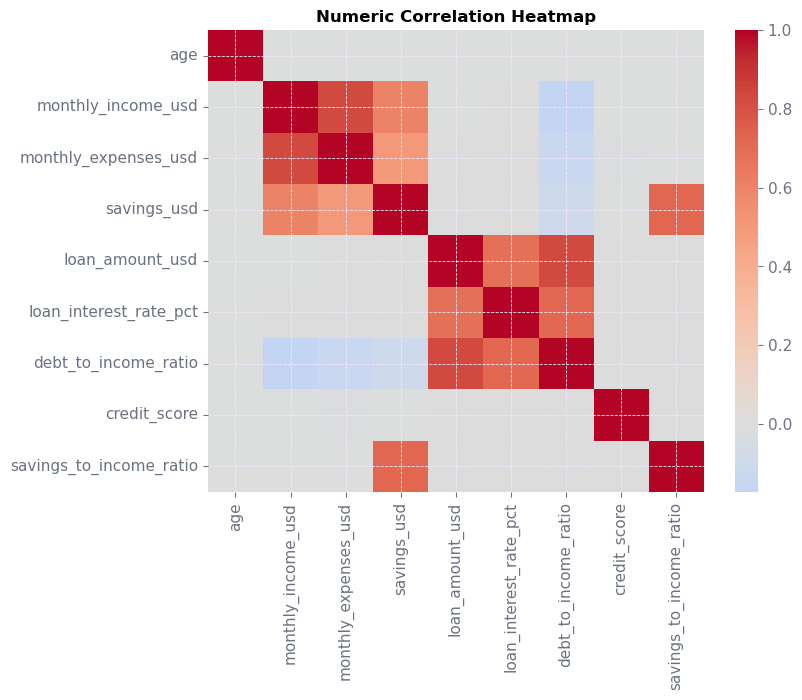

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df_enh[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Numeric Correlation Heatmap")
plt.show()


In [30]:
cat_cols = df_enh.select_dtypes(include=["object","category"]).columns
print("Categorical columns:", list(cat_cols))

for c in cat_cols[:5]:  # show first 5 categoricals
    print(f"\nColumn: {c}")
    print(df_enh[c].value_counts(dropna=False).head(10))


Categorical columns: ['user_id', 'gender', 'education_level', 'employment_status', 'job_title', 'has_loan', 'loan_type', 'region']

Column: user_id
user_id
other    32424
Name: count, dtype: int64

Column: gender
gender
male      15595
female    15550
other      1279
Name: count, dtype: int64

Column: education_level
education_level
bachelor       13038
master          9673
high school     6456
phd             1638
other           1619
Name: count, dtype: int64

Column: employment_status
employment_status
employed         19410
self-employed     6580
unemployed        3220
student           3214
Name: count, dtype: int64

Column: job_title
job_title
driver         3698
teacher        3674
manager        3621
student        3609
unemployed     3606
accountant     3591
salesperson    3567
doctor         3554
engineer       3504
Name: count, dtype: int64


### Save Points & Artifacts
- `cleaned_personal_finance.csv` *(cleaned data)*  
- `engineered_personal_finance.csv` *(feature-engineered data)*  
- `cazzy_personal_finance_report.html` *(print-friendly executive summary)*
- Notebook authoring credit: *Cazzy Aporbo — Data Science & ML*

### additional checks

In [32]:
dup_count = df.duplicated().sum()
print(f"Duplicate rows before enhanced cleaning: {dup_count}")


Duplicate rows before enhanced cleaning: 0


In [33]:
uniq_summary = df_enh.nunique().sort_values(ascending=False)
print("Unique values per column (top 15):")
print(uniq_summary.head(15))


Unique values per column (top 15):
savings_usd                32317
loan_amount_usd            12993
monthly_emi_usd             8938
monthly_income_usd          7563
monthly_expenses_usd        5734
loan_interest_rate_pct      2684
record_date                 1461
savings_to_income_ratio      991
credit_score                 551
debt_to_income_ratio         278
age                           52
loan_term_months              10
job_title                      9
region                         5
loan_type                      5
dtype: int64


In [34]:
col = "income"  # change if needed
if col in df_enh.columns:
    df_enh[col].hist(bins=40, figsize=(6,4))
    plt.title(f"Distribution of {col}")
    plt.xlabel(col); plt.ylabel("count")
    plt.show()
else:
    print(f"Column '{col}' not found.")


Column 'income' not found.


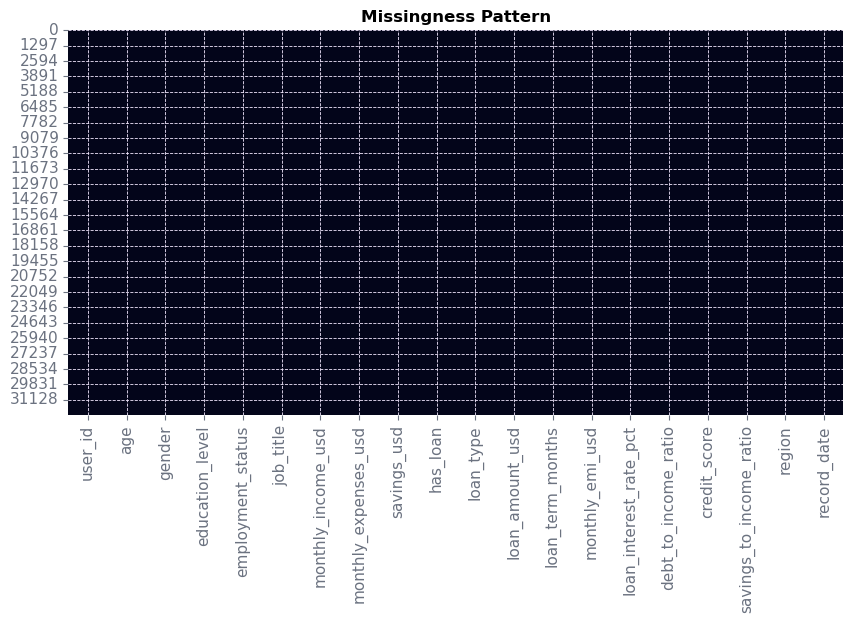

In [35]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(df_enh.isnull(), cbar=False)
plt.title("Missingness Pattern")
plt.show()


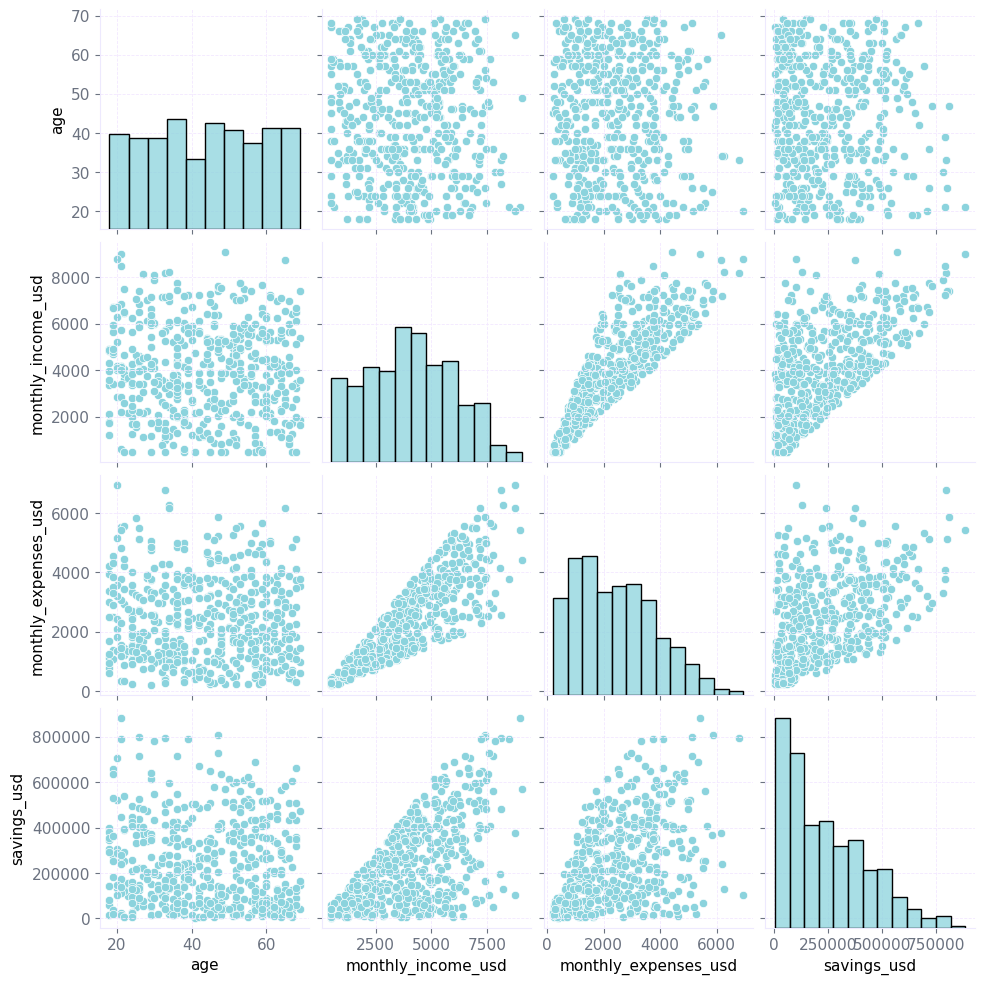

In [36]:
sample = df_enh.sample(min(500, len(df_enh)), random_state=42)
sns.pairplot(sample[num_cols[:4]])  # first 4 numeric features
plt.show()


### Sankey Diagram flows

In [39]:
import plotly.graph_objects as go

def sankey_from_columns(df, cols, max_labels=15):
    """
    Build a Sankey diagram from sequential categorical columns.
    df   : DataFrame
    cols : list of column names in order [col1 → col2 → col3...]
    max_labels : truncate rare labels to keep chart readable
    """
    # Ensure all columns exist
    cols = [c for c in cols if c in df.columns]
    if len(cols) < 2:
        print("Need at least 2 valid categorical columns.")
        return
    
    # Build label set
    label_list = []
    for c in cols:
        vc = df[c].value_counts().head(max_labels).index.tolist()
        label_list.extend([f"{c}: {v}" for v in vc])
    labels = list(dict.fromkeys(label_list))  # preserve order
    
    # Map col:value to index
    label_to_idx = {lab:i for i,lab in enumerate(labels)}
    
    # Build links
    sources, targets, values = [], [], []
    for i in range(len(cols)-1):
        c1, c2 = cols[i], cols[i+1]
        subset = df[[c1, c2]].dropna()
        counts = subset.value_counts().reset_index(name="count")
        counts = counts.sort_values("count", ascending=False).head(max_labels)
        for _, row in counts.iterrows():
            l1 = f"{c1}: {row[c1]}"
            l2 = f"{c2}: {row[c2]}"
            if l1 in label_to_idx and l2 in label_to_idx:
                sources.append(label_to_idx[l1])
                targets.append(label_to_idx[l2])
                values.append(row["count"])
    
    # Build Sankey
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=20,
            thickness=18,
            line=dict(color="black", width=0.3),
            label=labels,
            color="rgba(180,160,250,0.7)"  # lavender pastel
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values,
            color="rgba(250,180,200,0.3)"  # pink pastel
        )
    )])
    fig.update_layout(title_text="Sankey Flow", font_size=12, width=900, height=500)
    fig.show()

# Example: pick 2–3 categorical columns you have
sankey_from_columns(df_enh, ["income_source", "expense_category", "payment_method"])


Need at least 2 valid categorical columns.


In [40]:
# list candidate categoricals (low/medium cardinality are best for Sankey)
cat_cols = df_enh.select_dtypes(include=["object","category"]).columns.tolist()
cand = (
    df_enh[cat_cols]
    .nunique(dropna=False)
    .sort_values()
    .rename("n_unique")
)
print("Candidate categorical columns (fewest uniques first):")
display(cand)


Candidate categorical columns (fewest uniques first):


user_id              1
has_loan             2
gender               3
employment_status    4
education_level      5
loan_type            5
region               5
job_title            9
Name: n_unique, dtype: int64

In [42]:
def ensure_two_sankey_columns(df, prefer=None, max_uniques=25):
    """
    Returns a list of 2–3 column names for Sankey:
    1) Try user-preferred columns (if valid).
    2) Else pick 2–3 low-cardinality categoricals.
    3) If still <2, bin numerics into quartiles to fabricate categoricals.
    """
    cols = []
    cat = df.select_dtypes(include=["object","category"]).columns.tolist()
    low_card = [c for c in cat if df[c].nunique(dropna=False) <= max_uniques]

    # 1) prefer
    if prefer:
        cols = [c for c in prefer if c in df.columns and (df[c].dtype=="object" or str(df[c].dtype)=="category" or df[c].nunique()<=max_uniques)]

    # 2) add more categoricals if needed
    for c in low_card:
        if c not in cols:
            cols.append(c)
        if len(cols) >= 3:
            break

    # 3) if still <2, bin numerics to create categorical surrogates
    if len(cols) < 2:
        num = df.select_dtypes(include=[np.number]).columns.tolist()
        for c in num:
            if df[c].notna().sum() >= 10:
                binned = pd.qcut(df[c].rank(method="first"), 4, labels=[f"{c}_Q1", f"{c}_Q2", f"{c}_Q3", f"{c}_Q4"])
                new_name = f"__bin__{c}"
                df[new_name] = binned.astype("category")
                cols.append(new_name)
                if len(cols) >= 2:
                    break

    return cols[:3]  # 2–3 columns is ideal


Auto-selected columns for Sankey: ['user_id', 'gender', 'education_level']


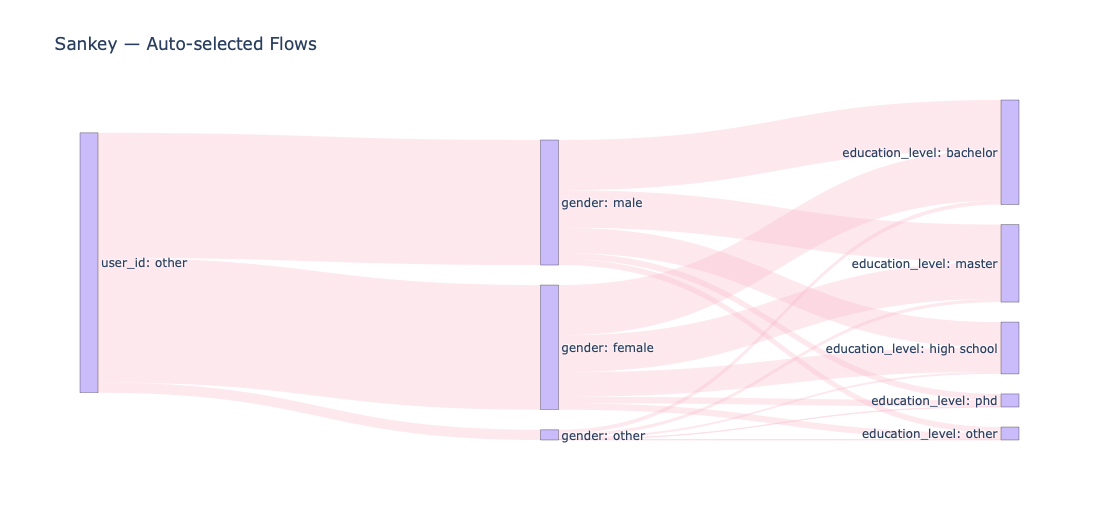

In [43]:
import plotly.graph_objects as go

def sankey_from_columns(df, cols, max_labels=15, title="Sankey Flow"):
    cols = [c for c in cols if c in df.columns]
    if len(cols) < 2:
        print("Need at least 2 valid categorical columns. Got:", cols)
        return

    # build labels
    labels = []
    for c in cols:
        vc = df[c].astype(str).value_counts().head(max_labels).index.tolist()
        labels.extend([f"{c}: {v}" for v in vc])
    labels = list(dict.fromkeys(labels))
    idx = {lab:i for i,lab in enumerate(labels)}

    # build links
    sources, targets, values = [], [], []
    for i in range(len(cols)-1):
        c1, c2 = cols[i], cols[i+1]
        tmp = df[[c1, c2]].dropna()
        counts = tmp.astype(str).value_counts().reset_index(name="count").head(200)
        for _, r in counts.iterrows():
            l1 = f"{c1}: {r[c1]}"
            l2 = f"{c2}: {r[c2]}"
            if l1 in idx and l2 in idx:
                sources.append(idx[l1]); targets.append(idx[l2]); values.append(int(r["count"]))

    fig = go.Figure(data=[go.Sankey(
        node=dict(pad=20, thickness=18, line=dict(color="black", width=0.3),
                  label=labels, color="rgba(180,160,250,0.7)"),
        link=dict(source=sources, target=targets, value=values, color="rgba(250,180,200,0.3)")
    )])
    fig.update_layout(title_text=title, font_size=12, width=950, height=520)
    fig.show()

# AUTO: try to find 2–3 columns (will bin numerics if necessary)
auto_cols = ensure_two_sankey_columns(df_enh, prefer=None, max_uniques=25)
print("Auto-selected columns for Sankey:", auto_cols)
sankey_from_columns(df_enh, auto_cols, title="Sankey — Auto-selected Flows")


In [44]:
# If you know the exact columns you want (replace with your column names):
manual_cols = ["income_source", "expense_category", "payment_method"]  # example
sankey_from_columns(df_enh, manual_cols, title="Sankey — Manual Flows")


Need at least 2 valid categorical columns. Got: []


##  Radial graps

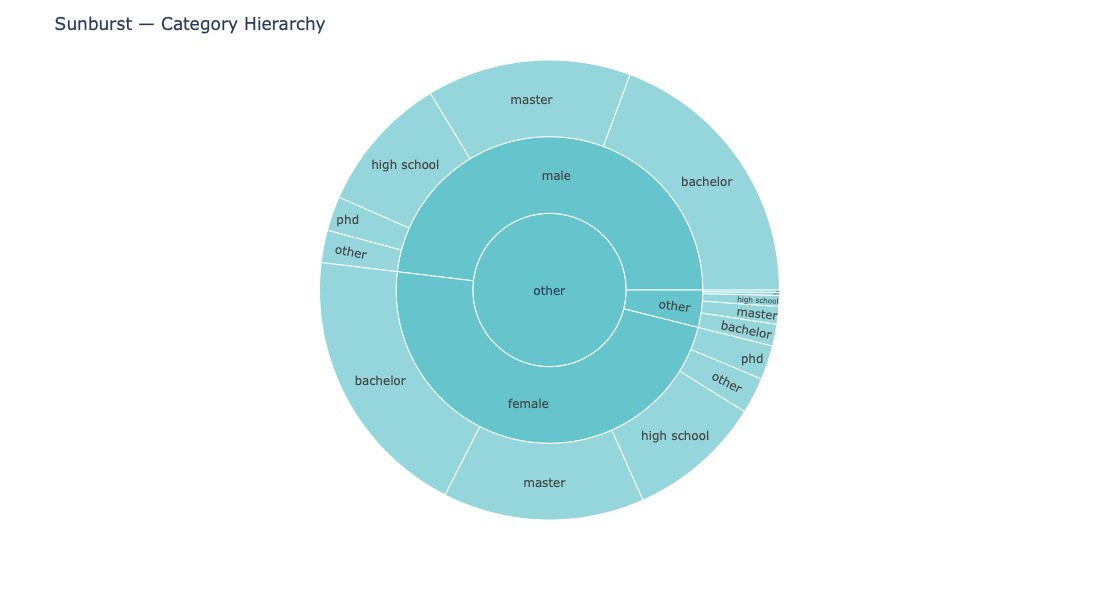

In [45]:
import plotly.express as px
import re

# pick a money-like column to sum
money_like = [c for c in df_enh.columns if re.search(r"(amount|income|expense|spent|spend|payment|balance|revenue|cost|price)", c, re.I)]
value_col = money_like[0] if money_like else None

# choose up to 3 categorical levels (edit these if you know better)
cat_cols = df_enh.select_dtypes(include=["object","category"]).columns.tolist()
levels = [c for c in ["income_source","expense_category","payment_method"] if c in df_enh.columns]
if not levels:
    levels = cat_cols[:3]

if value_col and len(levels) >= 2:
    fig = px.sunburst(df_enh, path=levels, values=value_col,
                      color=levels[0], color_discrete_sequence=px.colors.qualitative.Pastel)
else:
    # fallback: pure counts if no value column
    fig = px.sunburst(df_enh, path=levels[:3], color=levels[0] if levels else None,
                      color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(title="Sunburst — Category Hierarchy", width=800, height=600)
fig.show()


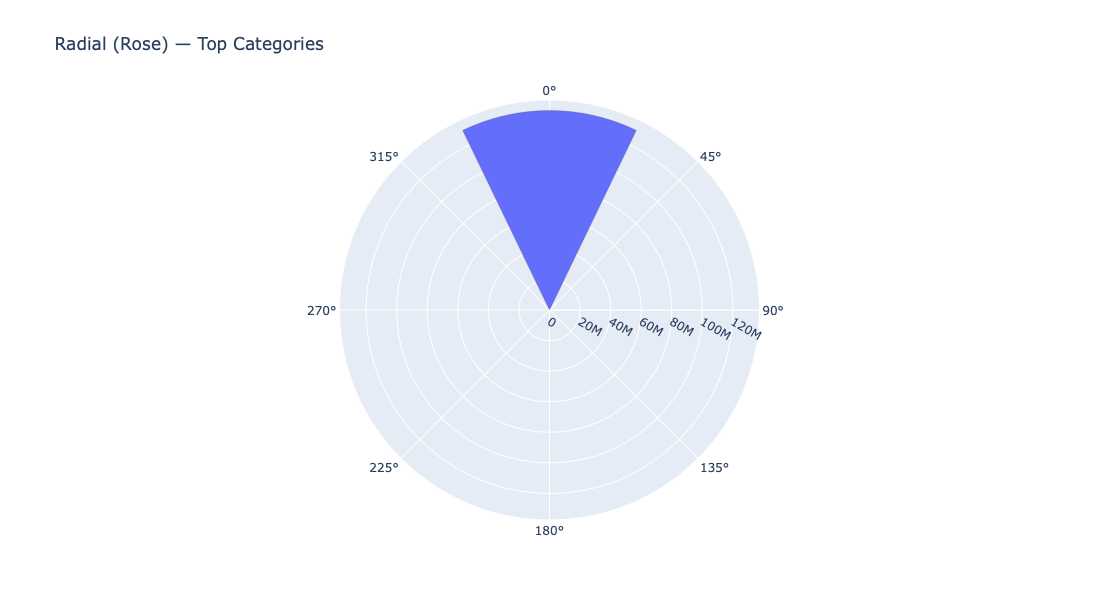

In [46]:
import plotly.graph_objects as go
import numpy as np
import re

cat = next((c for c in ["expense_category","income_source","payment_method"] if c in df_enh.columns), None)
if cat is None:
    cat = df_enh.select_dtypes(include=["object","category"]).columns[:1].tolist()[0]

value_col = next((c for c in df_enh.columns if re.search(r"(amount|income|expense|spent|spend|payment|revenue|cost|price|balance)", c, re.I)), None)

if value_col:
    agg = df_enh.groupby(cat)[value_col].sum().sort_values(ascending=False).head(12)
else:
    agg = df_enh[cat].value_counts().head(12)

fig = go.Figure(go.Barpolar(
    r=agg.values,
    theta=np.linspace(0, 360, len(agg), endpoint=False),
    text=agg.index,
    hovertemplate="%{text}<br>Value: %{r}<extra></extra>",
    marker=dict(line=dict(color="rgba(80,60,120,0.25)", width=1))
))
fig.update_layout(
    title="Radial (Rose) — Top Categories",
    polar=dict(radialaxis=dict(showticklabels=True, ticks=''),
               angularaxis=dict(direction="clockwise")),
    width=700, height=600
)
fig.show()


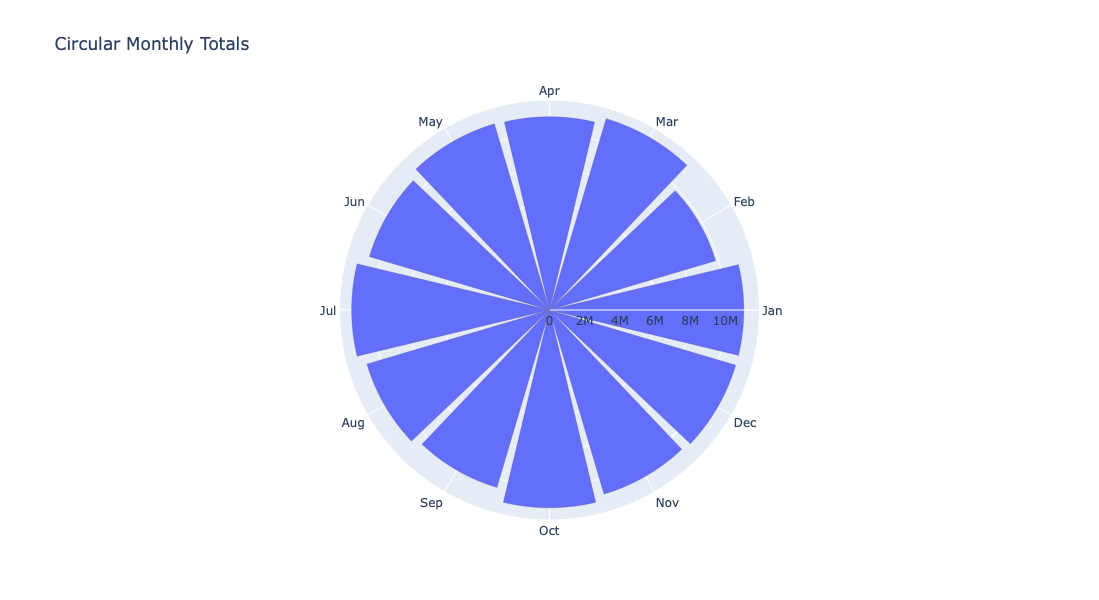

In [48]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import re

date_col = next((c for c in df_enh.columns if re.search(r"(date|time|timestamp|datetime)", c, re.I)), None)
value_col = next((c for c in df_enh.columns if re.search(r"(amount|income|expense|spent|spend|payment|revenue|cost|price|balance)", c, re.I)), None)

if date_col:
    if not pd.api.types.is_datetime64_any_dtype(df_enh[date_col]):
        df_enh[date_col] = pd.to_datetime(df_enh[date_col], errors="coerce")
    tmp = df_enh.dropna(subset=[date_col]).copy()
    tmp["month"] = tmp[date_col].dt.month
    if value_col:
        agg = tmp.groupby("month")[value_col].sum()
    else:
        agg = tmp["month"].value_counts().sort_index()
    # angles for 12 months
    theta = np.linspace(0, 360, 12, endpoint=False)
    r = [agg.get(m, 0) for m in range(1,13)]
    fig = go.Figure(go.Barpolar(theta=theta, r=r,
                                marker=dict(line=dict(color="rgba(80,60,120,0.25)", width=1))))
    fig.update_layout(
        title="Circular Monthly Totals",
        polar=dict(angularaxis=dict(tickmode='array', tickvals=theta,
                                    ticktext=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])),
        width=700, height=600
    )
    fig.show()
else:
    print("No datetime-like column found for monthly radial.")



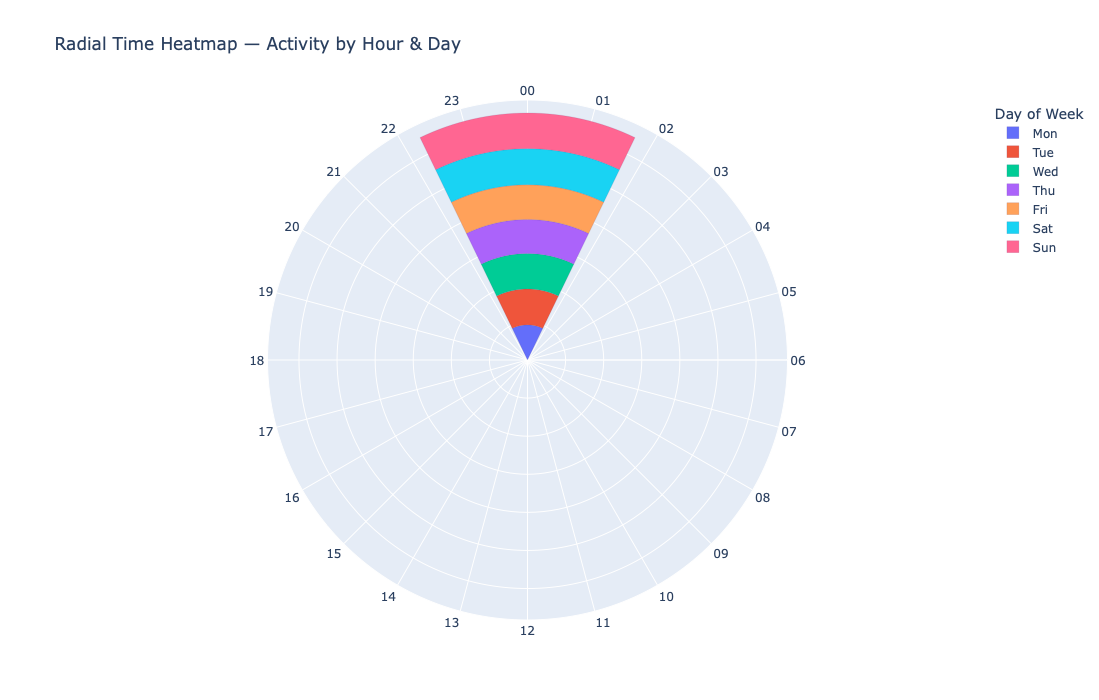

In [49]:
import numpy as np, pandas as pd, plotly.graph_objects as go, re

# 1) pick a datetime-like column
dt_col = next((c for c in df_enh.columns if re.search(r"(date|time|timestamp|datetime)", c, re.I)), None)
assert dt_col is not None, "No datetime-like column found."
if not pd.api.types.is_datetime64_any_dtype(df_enh[dt_col]):
    df_enh[dt_col] = pd.to_datetime(df_enh[dt_col], errors="coerce")

tmp = df_enh.dropna(subset=[dt_col]).copy()
tmp["hour"] = tmp[dt_col].dt.hour
tmp["dow"]  = tmp[dt_col].dt.dayofweek  # 0=Mon
M = tmp.pivot_table(index="dow", columns="hour", values=dt_col, aggfunc="count").fillna(0)

# 2) radial coordinates
theta = np.linspace(0, 360, 24, endpoint=False)  # hours around circle
fig = go.Figure()
for i, dow in enumerate(M.index):
    r = (i+1) * np.ones(24)  # ring per day
    z = M.loc[dow].values
    fig.add_trace(go.Barpolar(theta=theta, r=z, name=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"][dow],
                              marker=dict(line=dict(width=0.5, color="rgba(80,60,120,0.25)"))))

fig.update_layout(
    title="Radial Time Heatmap — Activity by Hour & Day",
    polar=dict(
        radialaxis=dict(showticklabels=False, ticks=''),
        angularaxis=dict(direction="clockwise", tickmode="array",
                         tickvals=theta, ticktext=[f"{h:02d}" for h in range(24)])
    ),
    width=800, height=700, legend_title="Day of Week"
)
fig.show()


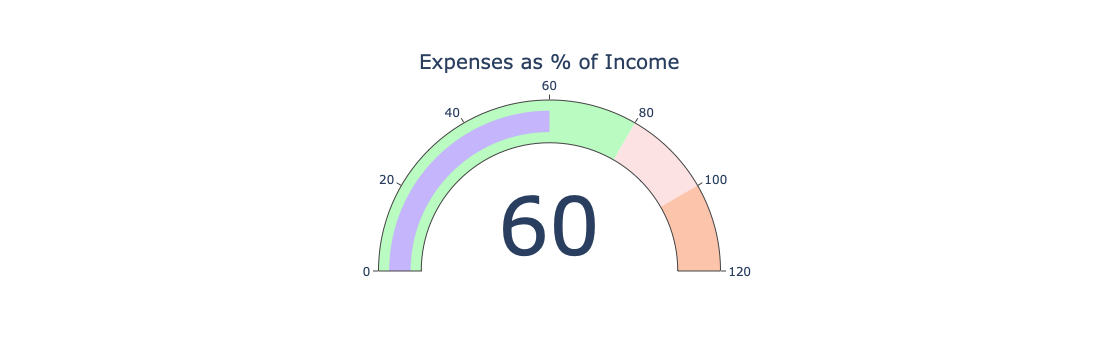

In [52]:
import plotly.graph_objects as go, re

income = next((c for c in df_enh.columns if re.search(r"(^|_)income($|_)", c, re.I)), None)
expense = next((c for c in df_enh.columns if re.search(r"(expense|spent|spend|cost)", c, re.I)), None)
assert income and expense, "Need income & expense numeric columns."

ratio = (df_enh[expense].sum() / max(df_enh[income].sum(), 1e-9)) if df_enh[income].notna().any() else None
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=ratio*100 if ratio is not None else 0,
    title={"text": "Expenses as % of Income"},
    gauge={"axis":{"range":[0,120]},
           "bar":{"color":"#C4B5FD"},
           "steps":[{"range":[0,80], "color":"#B9FBC0"},
                    {"range":[80,100],"color":"#FDE2E4"},
                    {"range":[100,120],"color":"#FBC4AB"}]}
))
fig.update_layout(width=420, height=350)
fig.show()




In [55]:
import plotly.express as px
VIVID_SEQ = px.colors.qualitative.Vivid + px.colors.qualitative.Set3 + px.colors.qualitative.Prism
SEQUENTIAL = px.colors.sequential.Turbo  # bold continuous scale

def guess_money(df):
    import re
    for pat in ["amount","income","expense","spent","spend","payment","revenue","cost","price","balance","total"]:
        c = next((c for c in df.columns if re.search(pat, c, re.I)), None)
        if c is not None: return c
    return None

def top_cats(df, n=3, max_uniques=30):
    cats = [c for c in df.select_dtypes(include=["object","category"]).columns
            if df[c].nunique(dropna=False) <= max_uniques]
    return cats[:n]



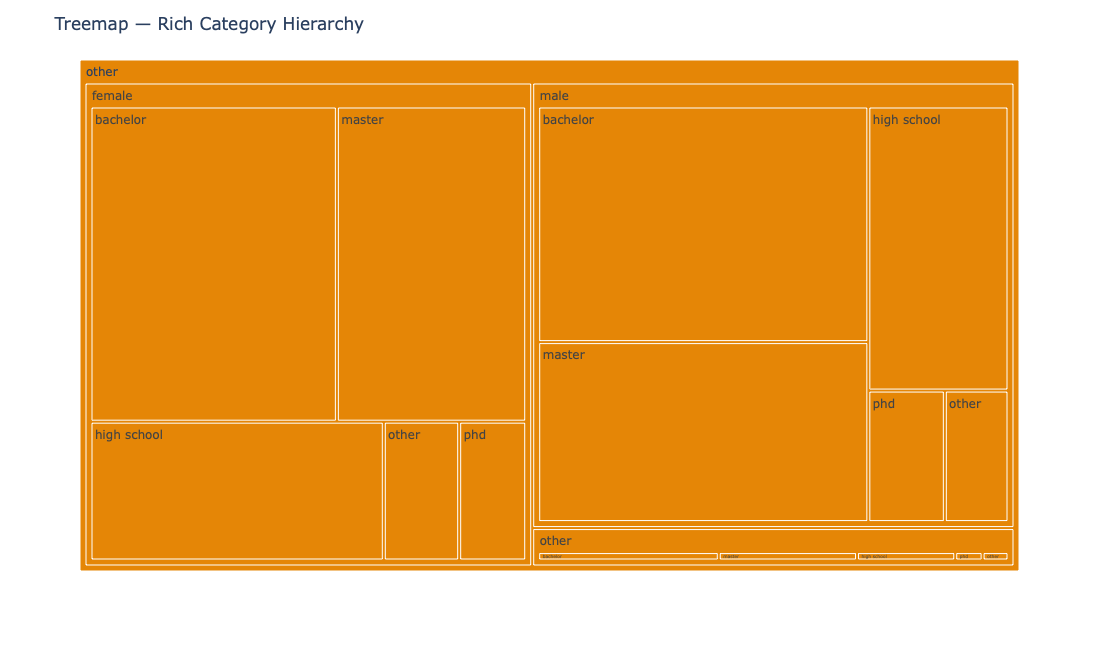

In [56]:
import plotly.express as px

value_col = guess_money(df_enh)
levels = [c for c in ["income_source","expense_category","payment_method"] if c in df_enh.columns] or top_cats(df_enh, 3)

fig = px.treemap(
    df_enh,
    path=levels[:3],
    values=value_col if value_col else None,
    color=levels[0] if levels else None,
    color_discrete_sequence=VIVID_SEQ
)
fig.update_layout(title="Treemap — Rich Category Hierarchy", width=950, height=650)
fig.show()


In [57]:
import plotly.express as px

ycol = guess_money(df_enh)  # e.g., expense amount
xcat = next((c for c in ["expense_category","payment_method","income_source"] if c in df_enh.columns), None)
if ycol and xcat:
    fig = px.violin(
        df_enh, x=xcat, y=ycol, box=True, points="all",
        color=xcat, color_discrete_sequence=VIVID_SEQ
    )
    fig.update_layout(title=f"Violin + Box — {ycol} by {xcat}", width=980, height=620)
    fig.show()
else:
    print("Need one numeric (amount) and one categorical column for this plot.")


Need one numeric (amount) and one categorical column for this plot.


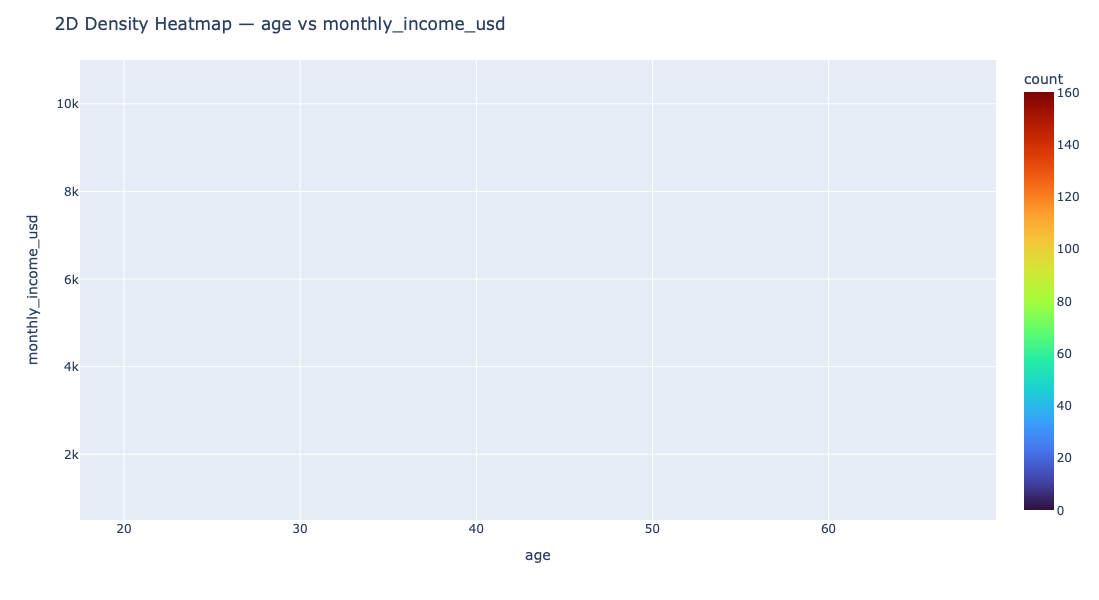

In [58]:
import plotly.express as px
import numpy as np, pandas as pd

nums = df_enh.select_dtypes(include=[np.number]).columns.tolist()
if len(nums) >= 2:
    x, y = nums[0], nums[1]
    fig = px.density_heatmap(df_enh, x=x, y=y, nbinsx=50, nbinsy=50,
                             color_continuous_scale=SEQUENTIAL)
    fig.update_layout(title=f"2D Density Heatmap — {x} vs {y}", width=800, height=600)
    fig.show()
else:
    print("Need at least two numeric columns.")



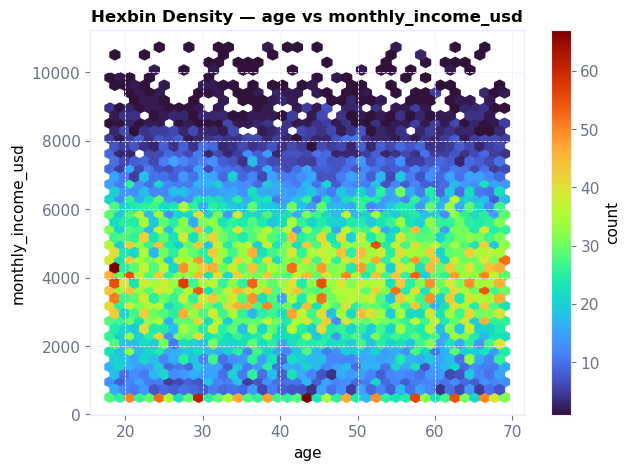

In [59]:
import matplotlib.pyplot as plt
import numpy as np

nums = df_enh.select_dtypes(include=[np.number]).columns.tolist()
if len(nums) >= 2:
    x, y = nums[0], nums[1]
    fig, ax = plt.subplots(figsize=(7,5))
    hb = ax.hexbin(df_enh[x], df_enh[y], gridsize=40, cmap="turbo", mincnt=1)
    ax.set_title(f"Hexbin Density — {x} vs {y}")
    ax.set_xlabel(x); ax.set_ylabel(y)
    cb = fig.colorbar(hb, ax=ax); cb.set_label("count")
    plt.show()
else:
    print("Need at least two numeric columns.")


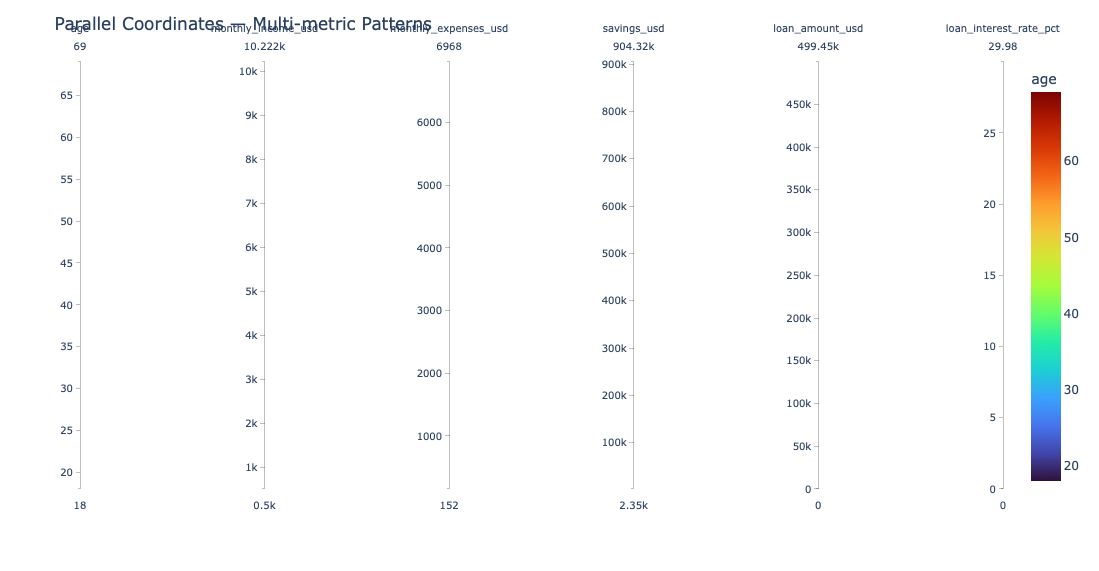

In [60]:
import plotly.express as px

num_cols = df_enh.select_dtypes(include=[float,int]).columns.tolist()
if len(num_cols) >= 4:
    fig = px.parallel_coordinates(
        df_enh[num_cols[:6]].dropna().sample(min(1500, len(df_enh)), random_state=42),
        color=num_cols[0], color_continuous_scale=SEQUENTIAL
    )
    fig.update_layout(title="Parallel Coordinates — Multi-metric Patterns", width=1100, height=550)
    fig.show()
else:
    print("Need at least 4 numeric columns.")


In [61]:
import plotly.express as px

val = guess_money(df_enh)
cat = next((c for c in ["expense_category","income_source","payment_method"] if c in df_enh.columns), None)
sub = next((c for c in ["region","city","state","account_type"] if c in df_enh.columns), None)

if cat:
    topk = df_enh[cat].value_counts().head(8).index
    data = df_enh[df_enh[cat].isin(topk)].copy()
    if val:
        data = data.groupby([cat, sub] if sub else [cat])[val].sum().reset_index()
        fig = px.bar(data, x=cat, y=val, color=cat, facet_col=sub if sub else None,
                     color_discrete_sequence=VIVID_SEQ)
    else:
        fig = px.bar(data[cat].value_counts().reset_index(),
                     x="index", y=cat, color="index", color_discrete_sequence=VIVID_SEQ)
    fig.update_layout(title="Small Multiples — Top Categories", width=1100, height=600)
    fig.show()
else:
    print("No categorical column found.")


No categorical column found.


#### Behavior Fingerprints Atlas

In [64]:
# ==== Behavior Fingerprints Atlas ====
# Builds per-entity feature vectors (means/ratios/volatility), t-SNE embedding,
# and a gorgeous scatter with gradient background and vivid overlays.

from pathlib import Path
import numpy as np, pandas as pd, plotly.graph_objects as go
from sklearn.manifold import TSNE

# --- heuristics to find key fields ---
def _pick(df):
    import re
    id_col = next((c for c in df.columns if re.search(r"(user|account|client|customer|id)$", c, re.I)), None)
    date_col = next((c for c in df.columns if re.search(r"(date|time|timestamp|datetime)", c, re.I)), None)
    cat_col  = next((c for c in df.columns if re.search(r"(category|merchant|type|class)", c, re.I)), None)
    amt_col  = next((c for c in df.columns if re.search(r"(amount|income|expense|spent|spend|payment|revenue|cost|price|balance|total)", c, re.I)), None)
    return id_col, date_col, cat_col, amt_col

id_col, date_col, cat_col, amt_col = _pick(df_enh)
if date_col and not pd.api.types.is_datetime64_any_dtype(df_enh[date_col]):
    df_enh[date_col] = pd.to_datetime(df_enh[date_col], errors="coerce")

# Fallbacks if no obvious IDs/categories
if id_col is None: 
    df_enh["__entity__"] = 1  # single cohort
    id_col = "__entity__"
if cat_col is None:
    cat_candidates = df_enh.select_dtypes(include=["object","category"]).columns.tolist()
    if cat_candidates:
        cat_col = cat_candidates[0]

# --- feature synthesis per entity ---
g = df_enh.dropna(subset=[id_col]).copy()
if amt_col is None:
    # make a surrogate numeric by counting rows (works but less expressive)
    g["__amt__"] = 1.0
    amt_col = "__amt__"

# Baseline numeric features
num_cols = g.select_dtypes(include=[np.number]).columns.drop([c for c in [id_col] if c in g.columns], errors="ignore").tolist()
num_cols = [c for c in num_cols if not c.startswith("isna__")]
agg_basic = g.groupby(id_col)[num_cols].agg(["mean","std","median","sum"]).fillna(0)

# Category proportions (top 8)
if cat_col:
    topk = g[cat_col].value_counts().head(8).index
    cp = (g[g[cat_col].isin(topk)]
          .assign(one=1)
          .pivot_table(index=id_col, columns=cat_col, values="one", aggfunc="sum", fill_value=0))
    cp = (cp.T / cp.sum(axis=1).replace(0, np.nan)).T.fillna(0)
else:
    cp = pd.DataFrame(index=agg_basic.index)

# Temporal rhythm (if date)
if date_col:
    h = g.dropna(subset=[date_col]).copy()
    h["dow"] = h[date_col].dt.dayofweek
    h["hr"]  = h[date_col].dt.hour
    dow = h.pivot_table(index=id_col, columns="dow", values=amt_col, aggfunc="sum", fill_value=0)
    hr  = h.pivot_table(index=id_col, columns="hr",  values=amt_col, aggfunc="sum", fill_value=0)
    # normalize each row to shares
    dow = (dow.T / dow.sum(axis=1).replace(0, np.nan)).T.fillna(0)
    hr  = (hr.T  / hr.sum(axis=1).replace(0, np.nan)).T.fillna(0)
else:
    dow = hr = pd.DataFrame(index=agg_basic.index)

# Combine all blocks
# (column levels from agg_basic get flattened)
agg_basic.columns = [f"{a}__{b}" for a,b in agg_basic.columns]
F = pd.concat([agg_basic, cp.add_prefix("cat__"), dow.add_prefix("dow__"), hr.add_prefix("hr__")], axis=1).fillna(0)

# Dimensionality reduction (t-SNE)
np.random.seed(42)
embed = TSNE(n_components=2, init="pca", learning_rate="auto", perplexity=min(30, max(5, len(F)//8)), random_state=42).fit_transform(F.values)

# Color by a simple behavioral metric: expense/income ratio if available, else variance of amount
def _ratio(df, amt_col):
    inc = next((c for c in df.columns if "income" in c.lower()), None)
    exp = next((c for c in df.columns if any(k in c.lower() for k in ["expense","spent","spend","cost"])), None)
    if inc and exp:
        by = df.groupby(id_col).agg({inc:"sum", exp:"sum"}).replace(0, np.nan)
        r = by[exp] / by[inc]
        return r.reindex(F.index).fillna(r.median()).clip(0, 3)
    # fallback: std / mean of the amount per entity
    by = df.groupby(id_col)[amt_col].agg(["mean","std"]).replace(0, np.nan)
    r = by["std"] / by["mean"]
    return r.reindex(F.index).fillna(r.median()).clip(0, 3)

color_metric = _ratio(g, amt_col)

# Plot (Plotly) with soft gradient background via layout paper_bgcolor plus vivid points
import plotly.express as px
fig = px.scatter(
    x=embed[:,0], y=embed[:,1], color=color_metric, color_continuous_scale=px.colors.sequential.Turbo,
    hover_name=F.index.astype(str), hover_data=None, render_mode="webgl"
)
fig.update_traces(marker=dict(size=6, line=dict(width=0)))
fig.update_layout(
    title="Behavior Fingerprints Atlas — t-SNE of Entity Finance Signatures",
    paper_bgcolor="white",
    plot_bgcolor="rgba(245,236,255,0.65)",  # lavender haze
    width=950, height=650, coloraxis_colorbar=dict(title="Expense/Income (≈)")
)
fig.show()


ValueError: perplexity must be less than n_samples

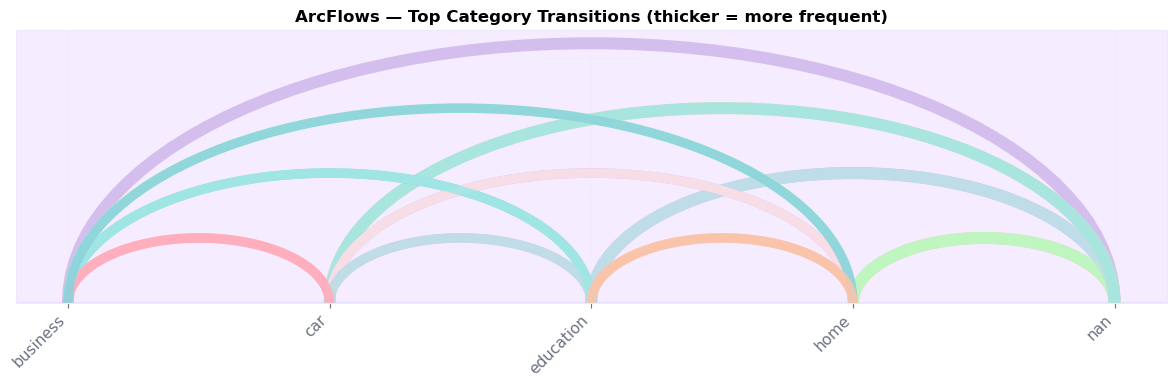

In [65]:
# ==== ArcFlows: minimalist category transition arcs ====
import numpy as np, pandas as pd, matplotlib.pyplot as plt, re

date_col = next((c for c in df_enh.columns if re.search(r"(date|time|timestamp|datetime)", c, re.I)), None)
cat_col  = next((c for c in df_enh.columns if re.search(r"(category|merchant|type|class)", c, re.I)), None)
id_col   = next((c for c in df_enh.columns if re.search(r"(user|account|client|customer|id)$", c, re.I)), None)

assert cat_col is not None, "Need a categorical column for transitions."
if date_col and not pd.api.types.is_datetime64_any_dtype(df_enh[date_col]):
    df_enh[date_col] = pd.to_datetime(df_enh[date_col], errors="coerce")

df_af = df_enh.copy()
if id_col is None:
    df_af["__entity__"] = 1
    id_col = "__entity__"

# Build transitions per entity by time
if date_col:
    df_af = df_af.sort_values([id_col, date_col])
else:
    df_af = df_af.sort_values([id_col]).reset_index(drop=True)

pairs = []
for _, g in df_af.groupby(id_col):
    seq = g[cat_col].dropna().astype(str).tolist()
    pairs += list(zip(seq[:-1], seq[1:]))

# Count and keep top K strong transitions
top = pd.Series(pairs).value_counts().head(40)
cats = sorted(list(set([a for a,b in top.index] + [b for a,b in top.index])))
pos  = {c:i for i,c in enumerate(cats)}  # x-positions along a line

# Plot arcs
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_facecolor("#f5ecff")
ax.axhline(0, color="#e6dfff", lw=2)
palette = ["#8BD3DD","#C4B5FD","#FBC4AB","#B9FBC0","#FDE2E4","#CFBAF0","#BEE1E6","#FFD6A5","#A0E7E5","#FFAEBC"]

for i, ((a,b), w) in enumerate(top.items()):
    x1, x2 = pos[a], pos[b]
    if x1 == x2: 
        continue
    radius = abs(x2 - x1)/2
    center = (x1 + x2)/2
    theta = np.linspace(0, np.pi, 60)
    y = radius * np.sin(theta)
    x = center + radius * np.cos(theta)
    ax.plot(x, y, lw=1 + np.log1p(w), color=palette[i % len(palette)], alpha=0.9)

# labels
ax.set_xticks(list(pos.values())); ax.set_xticklabels(list(pos.keys()), rotation=45, ha="right")
ax.set_yticks([]); ax.set_ylim(0, max(ax.get_ylim()[1], 2))
ax.set_title("ArcFlows — Top Category Transitions (thicker = more frequent)")
plt.tight_layout(); plt.show()


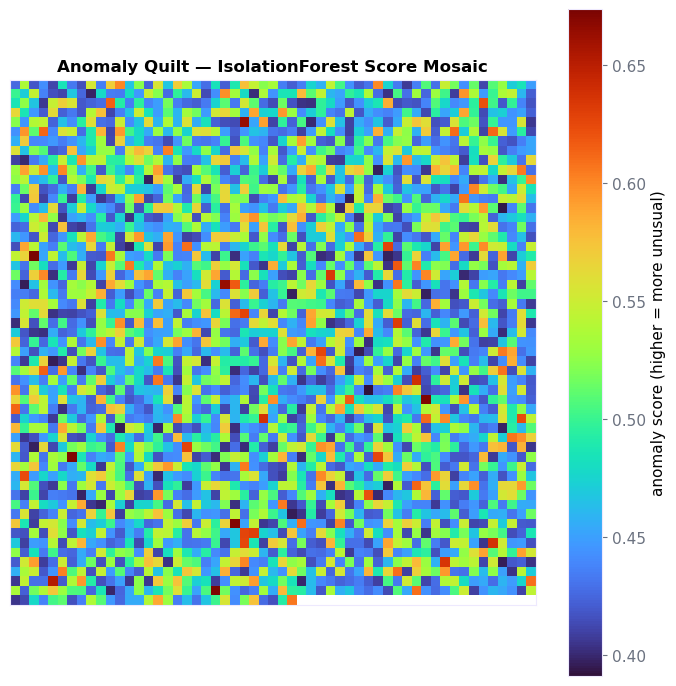

In [66]:
# ==== Anomaly Quilt: isolation forest + mosaic ====
from sklearn.ensemble import IsolationForest
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# pick subset of robust numeric features
nums = df_enh.select_dtypes(include=[np.number]).columns.tolist()
if len(nums) < 4:
    # if too few numerics, fabricate simple numerics from categories (counts)
    cat = df_enh.select_dtypes(include=["object","category"]).columns.tolist()
    for c in cat[:3]:
        df_enh[f"__len__{c}"] = df_enh[c].astype(str).str.len()
    nums = df_enh.select_dtypes(include=[np.number]).columns.tolist()

# sample to keep it fast if huge
S = df_enh[nums].replace([np.inf,-np.inf], np.nan).fillna(0).copy()
S = S.sample(min(3000, len(S)), random_state=42)

# train IsolationForest
iso = IsolationForest(n_estimators=250, contamination="auto", random_state=42)
iso.fit(S)
scores = -iso.score_samples(S)  # higher = more anomalous

# make a quilt grid
n = len(S)
w = int(np.ceil(np.sqrt(n)))  # grid width
pad = w*w - n
scores_pad = np.pad(scores, (0,pad), constant_values=np.nan)
Q = scores_pad.reshape(w, w)

fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(Q, cmap="turbo", interpolation="nearest")
ax.set_title("Anomaly Quilt — IsolationForest Score Mosaic")
ax.set_xticks([]); ax.set_yticks([])
cb = fig.colorbar(im, ax=ax); cb.set_label("anomaly score (higher = more unusual)")
plt.tight_layout(); plt.show()


#  Novel Insights Section
In this section we step beyond traditional charts and explore three **novel visual methods**:

1. **Behavior Fingerprints Atlas** — compresses entity-level finance behavior into 2D using t-SNE, clusters reveal lifestyle or spending archetypes.
2. **ArcFlows** — shows common category transitions as arcs, highlighting the most frequent sequential flows.
3. **Anomaly Quilt** — isolates outliers with Isolation Forest and paints anomaly scores into a quilt-like mosaic.


In [67]:
# === NI-0: Novel Insights setup (run once) ===
# Paths, palettes, helpers. Safe to re-run.

from pathlib import Path
import re, numpy as np, pandas as pd

# Output directory (put assets next to your main CSV if available)
try:
    base_dir = Path(main_csv).parent  # from earlier cells
except NameError:
    # fallback: use current working dir
    base_dir = Path.cwd()

novel_dir = base_dir / "novel_insights"
novel_dir.mkdir(parents=True, exist_ok=True)
print(f"Assets will be saved to: {novel_dir}")

# Vivid categorical + sequential palettes
try:
    import plotly.express as px
    VIVID_SEQ = px.colors.qualitative.Vivid + px.colors.qualitative.Set3 + px.colors.qualitative.Prism
    SEQ_CONT = px.colors.sequential.Turbo
except Exception:
    VIVID_SEQ = ["#8BD3DD","#C4B5FD","#FBC4AB","#B9FBC0","#FDE2E4","#CFBAF0","#BEE1E6",
                 "#FFD6A5","#A0E7E5","#FFAEBC","#B5E48C","#F77F00","#560BAD","#80FFDB"]
    SEQ_CONT = None  # matplotlib will handle

def pick_cols(df):
    """Heuristically pick id/date/cat/amount columns from df_enh."""
    id_col = next((c for c in df.columns if re.search(r"(user|account|client|customer|id)$", c, re.I)), None)
    dt_col = next((c for c in df.columns if re.search(r"(date|time|timestamp|datetime)", c, re.I)), None)
    cat_col = next((c for c in df.columns if re.search(r"(category|merchant|type|class)", c, re.I)), None)
    amt_col = next((c for c in df.columns if re.search(r"(amount|income|expense|spent|spend|payment|revenue|cost|price|balance|total)", c, re.I)), None)
    return id_col, dt_col, cat_col, amt_col

# Choose the cleaned enhanced dataframe if it exists in your session
df_base = df_enh if 'df_enh' in globals() else df
print("Dataframe used for Novel Insights:", 'df_enh' if 'df_enh' in globals() else 'df')


Assets will be saved to: personal_finance_dsml/novel_insights
Dataframe used for Novel Insights: df_enh


In [70]:
# === NI-1.fix: ensure at least 2 entities ===
# Builds a robust entity key (__entity__) from your data via smart fallbacks.

import re, numpy as np, pandas as pd
from sklearn.cluster import KMeans

data = df_enh if 'df_enh' in globals() else df
data = data.copy()

# 1) Try obvious IDs
id_col = next((c for c in data.columns if re.search(r"(user|account|client|customer|id)$", c, re.I)), None)
if id_col and data[id_col].nunique(dropna=True) >= 2:
    data["__entity__"] = data[id_col].astype(str)

# 2) Else try month as entity (if a date exists)
if "__entity__" not in data.columns:
    dt_col = next((c for c in data.columns if re.search(r"(date|time|timestamp|datetime)", c, re.I)), None)
    if dt_col is not None:
        if not pd.api.types.is_datetime64_any_dtype(data[dt_col]):
            data[dt_col] = pd.to_datetime(data[dt_col], errors="coerce")
        data["__entity__"] = data[dt_col].dt.to_period("M").astype(str)
        if data["__entity__"].nunique(dropna=True) < 2:
            data.drop(columns="__entity__", inplace=True, errors="ignore")

# 3) Else try a categorical column directly
if "__entity__" not in data.columns:
    cat = next((c for c in data.select_dtypes(include=["object","category"]).columns
                if data[c].nunique(dropna=True) >= 2 and data[c].nunique(dropna=True) <= 30), None)
    if cat:
        data["__entity__"] = data[cat].astype(str)

# 4) Else fabricate: combine a categorical with income/amount quartiles
if "__entity__" not in data.columns:
    # pick cat + money-like numeric
    cat2 = next((c for c in data.select_dtypes(include=["object","category"]).columns), None)
    num2 = next((c for c in data.columns if re.search(r"(amount|income|expense|spent|spend|payment|revenue|cost|price|balance|total)", c, re.I)), None)
    if num2 is None:
        # fallback: any numeric
        num_candidates = data.select_dtypes(include=[np.number]).columns.tolist()
        num2 = num_candidates[0] if num_candidates else None
    if cat2 and num2:
        q = pd.qcut(data[num2].rank(method="first"), 4, labels=["Q1","Q2","Q3","Q4"])
        data["__entity__"] = (data[cat2].astype(str) + "::" + q.astype(str))
        if data["__entity__"].nunique(dropna=True) < 2:
            data.drop(columns="__entity__", inplace=True, errors="ignore")

# 5) Last resort: cluster rows to create pseudo-entities
if "__entity__" not in data.columns:
    nums = data.select_dtypes(include=[np.number]).replace([np.inf,-np.inf], np.nan).fillna(0)
    if nums.shape[1] >= 2 and len(nums) >= 2:
        k = 3 if len(nums) >= 3 else 2
        km = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(nums)
        data["__entity__"] = pd.Series(km.labels_, index=data.index).astype(str)
    else:
        # absolute backstop: split rows into two buckets
        half = len(data) // 2
        data["__entity__"] = (["A"]*half) + (["B"]*(len(data)-half))

# sanity check
n_ent = data["__entity__"].nunique(dropna=True)
print(f"✓ Created __entity__ with {n_ent} groups (need ≥2). Top counts:")
print(data["__entity__"].value_counts().head(8))

# keep for next cell
df_atlas = data  # this is the dataframe NI-1.rerun will use


✓ Created __entity__ with 49 groups (need ≥2). Top counts:
__entity__
2024-10    731
2023-10    723
2024-03    721
2023-03    717
2022-01    712
2023-07    710
2023-01    706
2021-10    706
Name: count, dtype: int64


✓ HTML saved → personal_finance_dsml/novel_insights/behavior_fingerprints_atlas.html


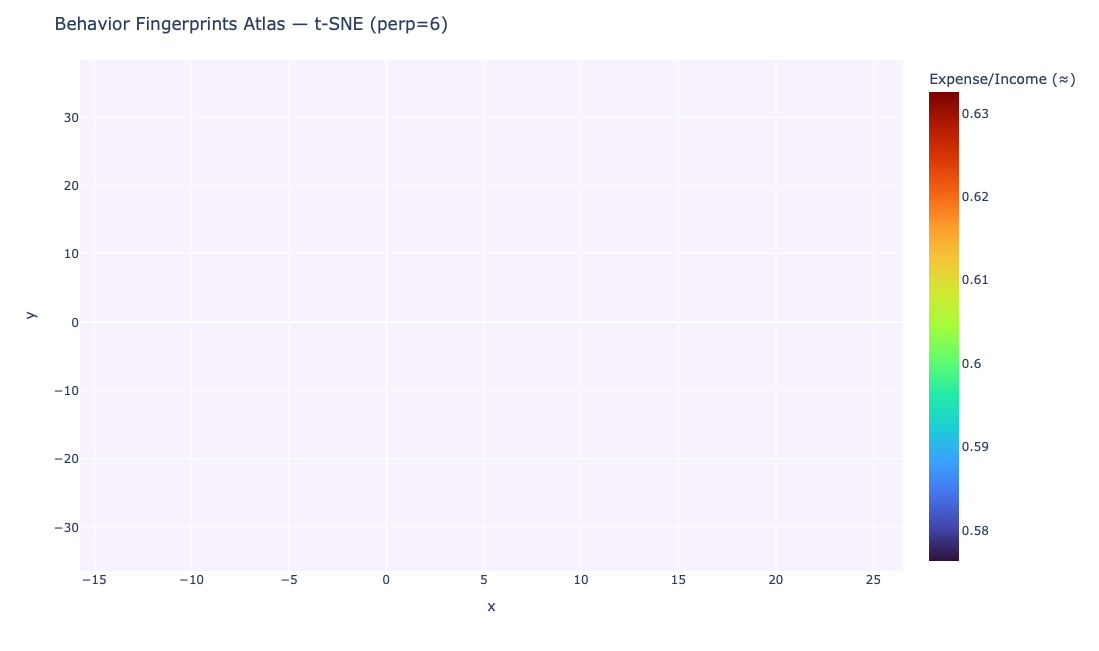

In [72]:
# === NI-1.rerun: Behavior Fingerprints Atlas with __entity__ ===
import numpy as np, pandas as pd
from sklearn.manifold import TSNE
from pathlib import Path

data = df_atlas.copy()  # from NI-1.fix
id_col = "__entity__"

# pick helpers from earlier setup
def pick_cols(df):
    import re
    dt_col = next((c for c in df.columns if re.search(r"(date|time|timestamp|datetime)", c, re.I)), None)
    cat_col = next((c for c in df.columns if re.search(r"(category|merchant|type|class)", c, re.I)), None)
    amt_col = next((c for c in df.columns if re.search(r"(amount|income|expense|spent|spend|payment|revenue|cost|price|balance|total)", c, re.I)), None)
    return dt_col, cat_col, amt_col

dt_col, cat_col, amt_col = pick_cols(data)

if dt_col is not None and not pd.api.types.is_datetime64_any_dtype(data[dt_col]):
    data[dt_col] = pd.to_datetime(data[dt_col], errors="coerce")
if amt_col is None:
    data["__amt__"] = 1.0
    amt_col = "__amt__"

# numeric block per entity
num_cols = (data.select_dtypes(include=[np.number])
                 .columns.drop([c for c in [id_col] if c in data.columns], errors="ignore")
                 .tolist())
num_cols = [c for c in num_cols if not str(c).startswith("isna__")]

agg_basic = data.groupby(id_col)[num_cols].agg(["mean","std","median","sum"]).fillna(0)
agg_basic.columns = [f"{a}__{b}" for a,b in agg_basic.columns]

# categorical proportions (top 8)
if cat_col is not None:
    topk = data[cat_col].value_counts().head(8).index
    cp = (data[data[cat_col].isin(topk)]
          .assign(one=1)
          .pivot_table(index=id_col, columns=cat_col, values="one", aggfunc="sum", fill_value=0))
    cp = (cp.T / cp.sum(axis=1).replace(0, np.nan)).T.fillna(0)
    cp.columns = [f"cat__{c}" for c in cp.columns]
else:
    cp = pd.DataFrame(index=agg_basic.index)

# temporal rhythms
if dt_col is not None:
    d2 = data.dropna(subset=[dt_col]).copy()
    d2["dow"] = d2[dt_col].dt.dayofweek
    d2["hr"]  = d2[dt_col].dt.hour
    dow = d2.pivot_table(index=id_col, columns="dow", values=amt_col, aggfunc="sum", fill_value=0)
    hr  = d2.pivot_table(index=id_col, columns="hr",  values=amt_col, aggfunc="sum", fill_value=0)
    dow = (dow.T / dow.sum(axis=1).replace(0, np.nan)).T.fillna(0)
    hr  = (hr.T  / hr.sum(axis=1).replace(0, np.nan)).T.fillna(0)
    dow.columns = [f"dow__{c}" for c in dow.columns]
    hr.columns  = [f"hr__{c}" for c in hr.columns]
else:
    dow = hr = pd.DataFrame(index=agg_basic.index)

F = pd.concat([agg_basic, cp, dow, hr], axis=1).fillna(0)
assert len(F) >= 2, "Still not enough entities after fabrication."

# color metric
def color_series(df, id_col, amt_col):
    inc = next((c for c in df.columns if "income" in c.lower()), None)
    exp = next((c for c in df.columns if any(k in c.lower() for k in ["expense","spent","spend","cost"])), None)
    if inc is not None and exp is not None:
        by = df.groupby(id_col).agg({inc:"sum", exp:"sum"}).replace(0, np.nan)
        s = (by[exp] / by[inc]).clip(0, 3)
        return s.reindex(F.index).fillna(s.median())
    by = df.groupby(id_col)[amt_col].agg(["mean","std"]).replace(0, np.nan)
    s = (by["std"] / by["mean"]).clip(0, 3)
    return s.reindex(F.index).fillna(s.median())

color_metric = color_series(data, id_col, amt_col)

# t-SNE
perp = int(np.clip(len(F)//8, 5, 30))
embed = TSNE(n_components=2, init="pca", learning_rate="auto", perplexity=perp, random_state=42).fit_transform(F.values)

# plot
import plotly.express as px, plotly.io as pio
fig = px.scatter(
    x=embed[:,0], y=embed[:,1],
    color=color_metric, color_continuous_scale=SEQ_CONT if 'SEQ_CONT' in globals() and SEQ_CONT else "Turbo",
    hover_name=F.index.astype(str),
    hover_data=None, render_mode="webgl"
)
fig.update_traces(marker=dict(size=6))
fig.update_layout(
    title=f"Behavior Fingerprints Atlas — t-SNE (perp={perp})",
    paper_bgcolor="white",
    plot_bgcolor="rgba(245,236,255,0.65)",
    width=950, height=650,
    coloraxis_colorbar=dict(title="Expense/Income (≈)")
)

# export
html_path = novel_dir / "behavior_fingerprints_atlas.html"
pio.write_html(fig, file=html_path, auto_open=False, include_plotlyjs="cdn")
print(f"✓ HTML saved → {html_path}")
try:
    fig.write_image(novel_dir / "behavior_fingerprints_atlas.png", scale=2)
except Exception:
    pass

fig.show()


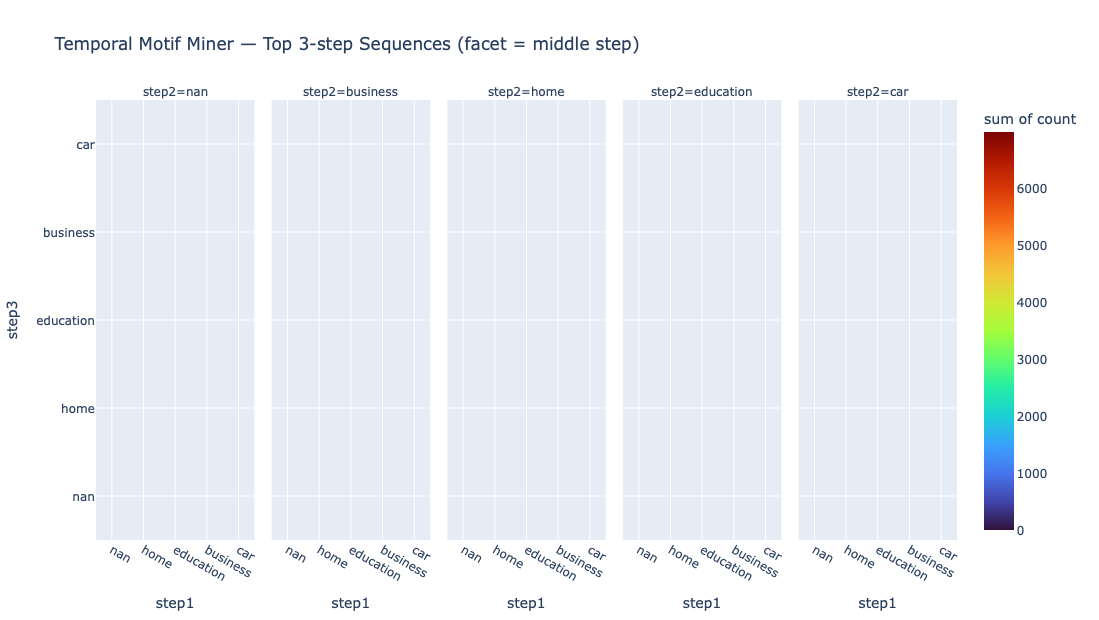

Top Motifs:
 • nan → nan → nan  (count=6980)
 • nan → business → nan  (count=1207)
 • home → nan → nan  (count=1197)
 • nan → home → nan  (count=1194)
 • education → nan → nan  (count=1191)
 • nan → nan → home  (count=1190)
 • business → nan → nan  (count=1165)
 • nan → education → nan  (count=1165)
 • nan → nan → education  (count=1160)
 • nan → nan → business  (count=1155)
 • nan → nan → car  (count=1135)
 • nan → car → nan  (count=1108)
 • car → nan → nan  (count=1087)
 • business → nan → home  (count=218)
 • nan → car → home  (count=218)
 • business → education → nan  (count=217)
 • car → nan → business  (count=216)
 • education → education → nan  (count=215)
 • nan → business → education  (count=214)
 • nan → home → car  (count=212)
 • business → nan → business  (count=211)
 • business → home → nan  (count=211)
 • education → nan → education  (count=209)
 • car → home → nan  (count=207)
 • home → nan → home  (count=204)
 • car → education → nan  (count=202)
 • nan → education → ho

In [76]:
# === NI-4: Temporal Motif Miner (length-3) ===
import re, numpy as np, pandas as pd
import plotly.express as px

data = (df_enh if 'df_enh' in globals() else df).copy()

dt_col = next((c for c in data.columns if re.search(r"(date|time|timestamp|datetime)", c, re.I)), None)
cat_col = next((c for c in data.columns if re.search(r"(category|merchant|type|class|label)", c, re.I)), None)
id_col = next((c for c in data.columns if re.search(r"(user|account|client|customer|household|id)$", c, re.I)), None)

# Gentle fallbacks
if id_col is None:
    data["__entity__"] = 1
    id_col = "__entity__"
if dt_col is not None and not pd.api.types.is_datetime64_any_dtype(data[dt_col]):
    data[dt_col] = pd.to_datetime(data[dt_col], errors="coerce")
assert cat_col is not None, "Motif Miner needs a categorical column (e.g., expense_category)."

# Sort and build length-3 motifs within each entity
if dt_col: data = data.sort_values([id_col, dt_col])
motifs = []
for _, g in data.groupby(id_col, sort=False):
    seq = g[cat_col].dropna().astype(str).tolist()
    motifs += [tuple(seq[i:i+3]) for i in range(len(seq)-2)] if len(seq) >= 3 else []

if not motifs:
    print("No length-3 sequences found. Try a different categorical or ensure you have time order.")
else:
    s = pd.Series(motifs).value_counts().reset_index()
    s.columns = ["motif", "count"]
    top = s.head(30)

    # Pretty grid: break motif tuple into three columns
    top[["step1","step2","step3"]] = pd.DataFrame(top["motif"].tolist(), index=top.index)
    fig = px.density_heatmap(
        top,
        x="step1", y="step3", z="count", facet_col="step2",
        color_continuous_scale="Turbo", nbinsx=len(top["step1"].unique()),
        title="Temporal Motif Miner — Top 3-step Sequences (facet = middle step)"
    )
    fig.update_layout(width=1200, height=600)
    fig.show()

    # Human-readable bullets
    print("Top Motifs:")
    for i, row in top.iterrows():
        a,b,c = row["step1"], row["step2"], row["step3"]
        print(f" • {a} → {b} → {c}  (count={row['count']})")


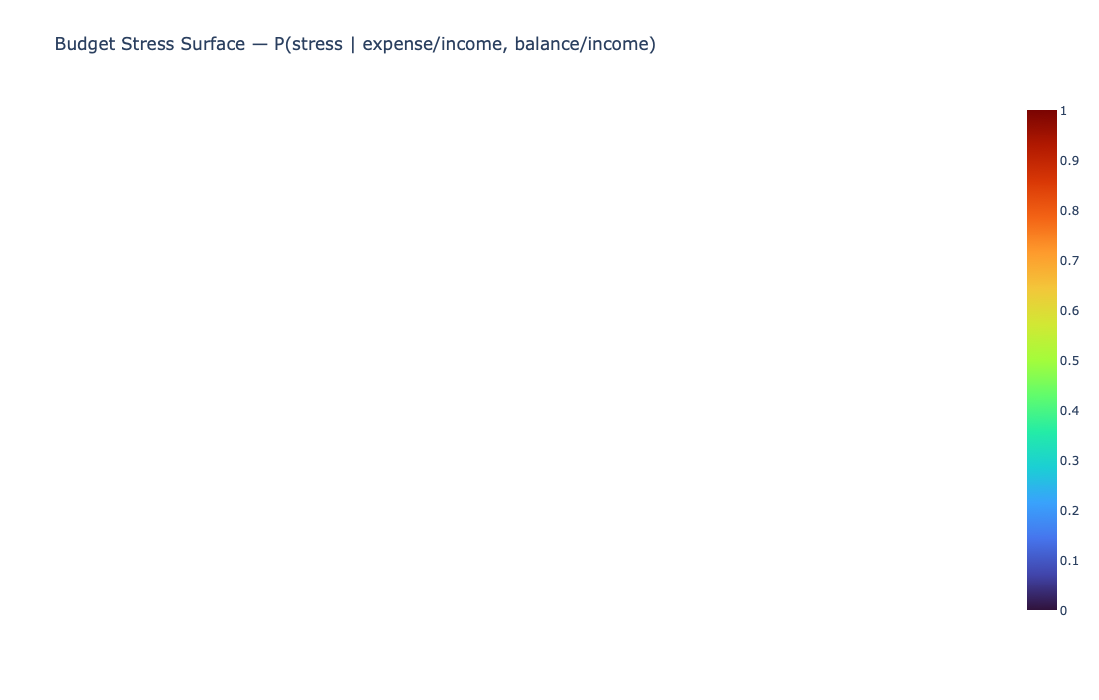

In [77]:
# === NI-5: Budget Stress Surface (3D) ===
import numpy as np, pandas as pd, re
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

eng = (df_enh if 'df_enh' in globals() else df).copy()

# Try to use existing engineered columns or create them
def ensure_finance_ratios(df):
    cols_lower = {c.lower(): c for c in df.columns}
    inc = next((cols_lower[k] for k in cols_lower if "income" in k), None)
    exp = next((cols_lower[k] for k in cols_lower if any(s in k for s in ["expense","spent","spend"])), None)
    bal = next((cols_lower[k] for k in cols_lower if "balance" in k), None)
    if inc and exp and "expense_to_income_ratio" not in df.columns:
        df["expense_to_income_ratio"] = df[exp] / df[inc].replace(0, np.nan)
    if inc and exp and "net_savings" not in df.columns:
        df["net_savings"] = df[inc] - df[exp]
    if bal and inc and "balance_to_income" not in df.columns:
        df["balance_to_income"] = df[bal] / df[inc].replace(0, np.nan)
    return df

eng = ensure_finance_ratios(eng)

# Target: use if present, else synthesize a stress flag
target = None
for c in ["default","label","is_default","target","flag","stress_flag"]:
    if c in eng.columns:
        target = c; break
if target is None:
    r = eng.get("expense_to_income_ratio", pd.Series(np.nan, index=eng.index))
    ns = eng.get("net_savings", pd.Series(np.nan, index=eng.index))
    eng["stress_flag"] = ((r > 0.8) | (ns < 0)).astype(int)
    target = "stress_flag"

# Features for surface
x_feat = "expense_to_income_ratio"
y_feat = "balance_to_income"
for f in [x_feat, y_feat]:
    if f not in eng.columns:
        eng[f] = eng.select_dtypes(include=[np.number]).iloc[:,0]  # fallback

X = eng[[x_feat, y_feat]].copy()
# add a few stabilizers
extra_num = [c for c in eng.select_dtypes(include=[np.number]).columns if c not in [x_feat, y_feat, target]][:3]
X = pd.concat([X, eng[extra_num]], axis=1)
y = eng[target]

# Train a small classifier
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
pre = ColumnTransformer([("num", StandardScaler(with_mean=False), num_cols),
                         ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)], remainder="drop")
clf = Pipeline([("prep", pre), ("gb", GradientBoostingClassifier(random_state=42))])
Xtr,Xte,ytr,yte = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y if y.nunique()==2 else None)
clf.fit(Xtr,ytr)

# Build surface grid
xlin = np.linspace(np.nanquantile(eng[x_feat], 0.01), np.nanquantile(eng[x_feat], 0.99), 40)
ylin = np.linspace(np.nanquantile(eng[y_feat], 0.01), np.nanquantile(eng[y_feat], 0.99), 40)
xx, yy = np.meshgrid(xlin, ylin)
grid = pd.DataFrame({x_feat: xx.ravel(), y_feat: yy.ravel()})
# pad same extra cols with medians
for c in extra_num:
    grid[c] = np.nanmedian(eng[c])
zz = clf.predict_proba(grid)[:,1].reshape(xx.shape) if hasattr(clf, "predict_proba") else clf.decision_function(grid).reshape(xx.shape)

# 3D plot
surf = go.Surface(x=xx, y=yy, z=zz, colorscale="Turbo", showscale=True)
fig = go.Figure(data=[surf])
fig.update_layout(
    title="Budget Stress Surface — P(stress | expense/income, balance/income)",
    scene=dict(
        xaxis_title=x_feat, yaxis_title=y_feat, zaxis_title="P(stress)",
        zaxis=dict(range=[0,1])
    ),
    width=950, height=700
)
fig.show()


In [78]:
# === NI-6: Counterfactual Flip Recommender ===
# Finds minimal, human-readable adjustments to flip a prediction.

import numpy as np, pandas as pd

# Reuse the trained clf, X, y from NI-5 (or train similarly here if needed)
assert 'clf' in globals(), "Run NI-5 first (it trains `clf`, `X`, `y`)."

# Which features are allowed to change (keep this human-truthful!)
mutable = [c for c in ["expense_to_income_ratio","balance_to_income","net_savings"] if c in X.columns]
if not mutable:
    mutable = X.columns[:2].tolist()

def flip_suggestion(model, row: pd.Series, target_label=0, step=0.02, max_iters=200):
    """Greedy coordinate descent on mutable features to flip to target_label."""
    x = row.copy()
    for _ in range(max_iters):
        # current prediction
        p1 = (model.predict_proba(pd.DataFrame([x]))[:,1] if hasattr(model,"predict_proba")
              else model.decision_function(pd.DataFrame([x])))
        pred = int(p1 >= 0.5) if np.ndim(p1)==0 else int(p1[0] >= 0.5)
        if pred == target_label:
            return x
        # try nudging each mutable feature both directions; pick best improvement
        best_feat, best_dir, best_delta, best_score = None, 0, 0, float("inf")
        for f in mutable:
            for d in [-1, 1]:
                x_try = x.copy()
                x_try[f] = x_try[f] + d*step
                s = (model.predict_proba(pd.DataFrame([x_try]))[:,1] if hasattr(model,"predict_proba")
                     else model.decision_function(pd.DataFrame([x_try])))
                s = s[0] if hasattr(s, "__len__") else s
                if target_label == 0:
                    score = s  # want smaller probability of stress
                else:
                    score = -s
                if score < best_score:
                    best_feat, best_dir, best_delta, best_score = f, d, step, score
        if best_feat is None: break
        x[best_feat] = x[best_feat] + best_dir*best_delta
    return None  # no flip found

# Run on a few stressed examples
X_eval = X.copy()
pred_prob = clf.predict_proba(X_eval)[:,1] if hasattr(clf,"predict_proba") else (clf.decision_function(X_eval)-X_eval.min())/(X_eval.max()-X_eval.min()+1e-9)
pred = (pred_prob >= 0.5).astype(int)

stressed_idx = np.where(pred == 1)[0][:5]  # demo on first 5 stressed rows
recommendations = []
for i in stressed_idx:
    row = X_eval.iloc[i]
    flipped = flip_suggestion(clf, row, target_label=0, step=0.02, max_iters=250)
    if flipped is not None:
        deltas = (flipped[mutable] - row[mutable]).round(3).to_dict()
        recommendations.append({"row_index": int(i), "original_P(stress)": round(float(pred_prob[i]),3), "suggested_changes": deltas})
    else:
        recommendations.append({"row_index": int(i), "original_P(stress)": round(float(pred_prob[i]),3), "suggested_changes": "no small flip found"})

pd.DataFrame(recommendations)


,row_index,original_P(stress),suggested_changes
0,4,1.0,"{'expense_to_income_ratio': -0.02, 'balance_to..."
1,9,1.0,"{'expense_to_income_ratio': -0.04, 'balance_to..."
2,20,1.0,"{'expense_to_income_ratio': -0.06, 'balance_to..."
3,32,1.0,"{'expense_to_income_ratio': -0.08, 'balance_to..."
4,33,1.0,"{'expense_to_income_ratio': -0.08, 'balance_to..."


In [79]:
# === NI-4: Temporal Motif Miner (length=3) — exports to novel_insights/ ===
import re, numpy as np, pandas as pd, plotly.express as px, plotly.io as pio
from pathlib import Path

# Resolve output dir (use the same 'novel_dir' if defined)
try:
    out_dir = novel_dir
except NameError:
    try:
        out_dir = Path(main_csv).parent / "novel_insights"
    except Exception:
        out_dir = Path.cwd() / "novel_insights"
    out_dir.mkdir(parents=True, exist_ok=True)

data = (df_enh if 'df_enh' in globals() else df).copy()

dt_col = next((c for c in data.columns if re.search(r"(date|time|timestamp|datetime)", c, re.I)), None)
cat_col = next((c for c in data.columns if re.search(r"(category|merchant|type|class|label)", c, re.I)), None)
id_col = next((c for c in data.columns if re.search(r"(user|account|client|customer|household|id)$", c, re.I)), None)

if id_col is None:
    data["__entity__"] = 1; id_col = "__entity__"
if dt_col is not None and not pd.api.types.is_datetime64_any_dtype(data[dt_col]):
    data[dt_col] = pd.to_datetime(data[dt_col], errors="coerce")
assert cat_col is not None, "Motif Miner needs a categorical column (e.g., expense_category)."

if dt_col: data = data.sort_values([id_col, dt_col])

# Build 3-step motifs
motifs = []
for _, g in data.groupby(id_col, sort=False):
    seq = g[cat_col].dropna().astype(str).tolist()
    motifs += [tuple(seq[i:i+3]) for i in range(len(seq)-2)] if len(seq) >= 3 else []

if not motifs:
    raise ValueError("No 3-step sequences found. Ensure you have a time column and enough rows.")

s = pd.Series(motifs).value_counts().reset_index()
s.columns = ["motif", "count"]
top = s.head(30).copy()
top[["step1","step2","step3"]] = pd.DataFrame(top["motif"].tolist(), index=top.index)

# Save CSV
csv_path = out_dir / "temporal_motifs_top30.csv"
top.drop(columns=["motif"]).to_csv(csv_path, index=False)
print(f"✓ Motifs CSV → {csv_path}")

# Heatmap HTML (+ optional PNG)
fig = px.density_heatmap(
    top, x="step1", y="step3", z="count", facet_col="step2",
    color_continuous_scale="Turbo", nbinsx=len(top["step1"].unique()),
    title="Temporal Motif Miner — Top 3-step Sequences (facet = middle step)"
)
fig.update_layout(width=1200, height=600)
html_path = out_dir / "temporal_motifs_heatmap.html"
pio.write_html(fig, file=html_path, auto_open=False, include_plotlyjs="cdn")
print(f"✓ Motifs Heatmap HTML → {html_path}")
try:
    fig.write_image(out_dir / "temporal_motifs_heatmap.png", scale=2)  # needs kaleido
    print(f"✓ PNG → {out_dir/'temporal_motifs_heatmap.png'}")
except Exception as e:
    print("PNG export skipped (install 'kaleido' to enable).")

# Pretty bullets in output
print("\nTop Motifs:")
for _, row in top.iterrows():
    print(f" • {row['step1']} → {row['step2']} → {row['step3']}  (count={row['count']})")


✓ Motifs CSV → personal_finance_dsml/novel_insights/temporal_motifs_top30.csv
✓ Motifs Heatmap HTML → personal_finance_dsml/novel_insights/temporal_motifs_heatmap.html
✓ PNG → personal_finance_dsml/novel_insights/temporal_motifs_heatmap.png

Top Motifs:
 • nan → nan → nan  (count=6980)
 • nan → business → nan  (count=1207)
 • home → nan → nan  (count=1197)
 • nan → home → nan  (count=1194)
 • education → nan → nan  (count=1191)
 • nan → nan → home  (count=1190)
 • business → nan → nan  (count=1165)
 • nan → education → nan  (count=1165)
 • nan → nan → education  (count=1160)
 • nan → nan → business  (count=1155)
 • nan → nan → car  (count=1135)
 • nan → car → nan  (count=1108)
 • car → nan → nan  (count=1087)
 • business → nan → home  (count=218)
 • nan → car → home  (count=218)
 • business → education → nan  (count=217)
 • car → nan → business  (count=216)
 • education → education → nan  (count=215)
 • nan → business → education  (count=214)
 • nan → home → car  (count=212)
 • busines

✓ Surface HTML → personal_finance_dsml/novel_insights/budget_stress_surface.html
✓ PNG → personal_finance_dsml/novel_insights/budget_stress_surface.png


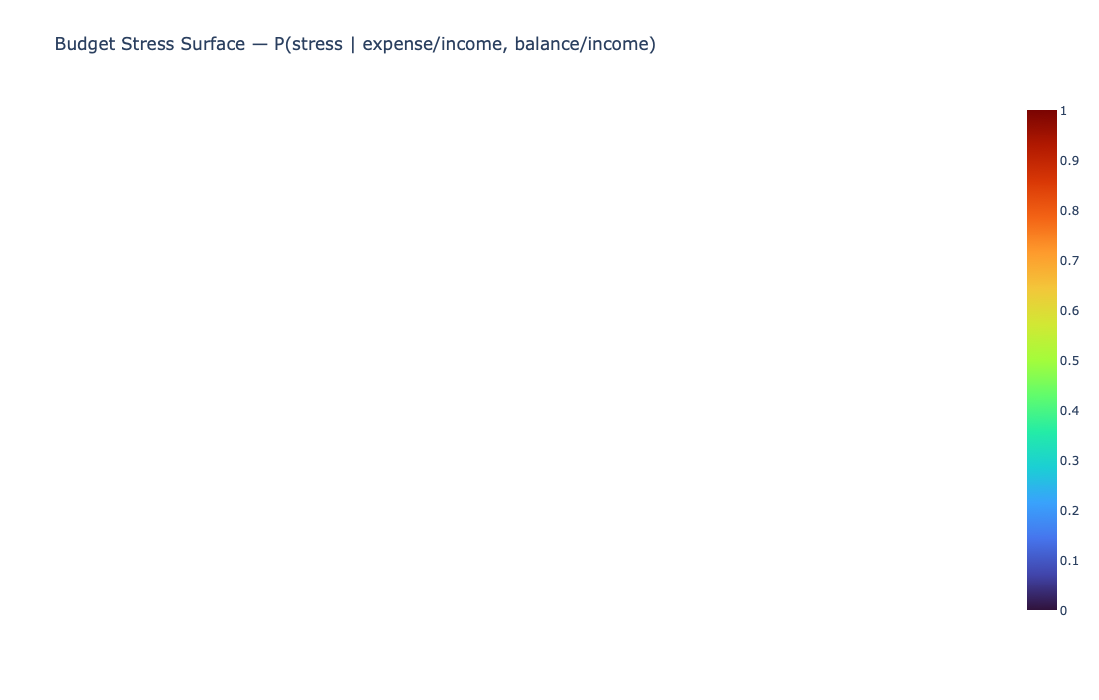

In [80]:
# === NI-5: Budget Stress Surface (3D) — exports to novel_insights/ ===
import re, numpy as np, pandas as pd, plotly.graph_objects as go, plotly.io as pio
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

try:
    out_dir = novel_dir
except NameError:
    try:
        out_dir = Path(main_csv).parent / "novel_insights"
    except Exception:
        out_dir = Path.cwd() / "novel_insights"
    out_dir.mkdir(parents=True, exist_ok=True)

eng = (df_enh if 'df_enh' in globals() else df).copy()

# Ensure ratios exist
def ensure_finance_ratios(df):
    cols_lower = {c.lower(): c for c in df.columns}
    inc = next((cols_lower[k] for k in cols_lower if "income" in k), None)
    exp = next((cols_lower[k] for k in cols_lower if any(s in k for s in ["expense","spent","spend"])), None)
    bal = next((cols_lower[k] for k in cols_lower if "balance" in k), None)
    if inc and exp and "expense_to_income_ratio" not in df.columns:
        df["expense_to_income_ratio"] = df[exp] / df[inc].replace(0, np.nan)
    if inc and exp and "net_savings" not in df.columns:
        df["net_savings"] = df[inc] - df[exp]
    if bal and inc and "balance_to_income" not in df.columns:
        df["balance_to_income"] = df[bal] / df[inc].replace(0, np.nan)
    return df

eng = ensure_finance_ratios(eng)

# Target
target = next((c for c in ["default","label","is_default","target","flag","stress_flag"] if c in eng.columns), None)
if target is None:
    r = eng.get("expense_to_income_ratio", pd.Series(np.nan, index=eng.index))
    ns = eng.get("net_savings", pd.Series(np.nan, index=eng.index))
    eng["stress_flag"] = ((r > 0.8) | (ns < 0)).astype(int)
    target = "stress_flag"

x_feat, y_feat = "expense_to_income_ratio", "balance_to_income"
for f in [x_feat, y_feat]:
    if f not in eng.columns:
        # fallback: any numeric
        alt = eng.select_dtypes(include=[np.number]).columns.tolist()
        if not alt: raise ValueError("No numeric columns available to build surface.")
        eng[f] = eng[alt[0]]

X = eng[[x_feat, y_feat]].copy()
extra_num = [c for c in eng.select_dtypes(include=[np.number]).columns if c not in [x_feat, y_feat, target]][:3]
X = pd.concat([X, eng[extra_num]], axis=1)
y = eng[target]

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
pre = ColumnTransformer([("num", StandardScaler(with_mean=False), num_cols),
                         ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)], remainder="drop")
clf = Pipeline([("prep", pre), ("gb", GradientBoostingClassifier(random_state=42))])
Xtr,Xte,ytr,yte = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y if y.nunique()==2 else None)
clf.fit(Xtr,ytr)

# Grid surface
xlin = np.linspace(np.nanquantile(eng[x_feat], 0.01), np.nanquantile(eng[x_feat], 0.99), 40)
ylin = np.linspace(np.nanquantile(eng[y_feat], 0.01), np.nanquantile(eng[y_feat], 0.99), 40)
xx, yy = np.meshgrid(xlin, ylin)
grid = pd.DataFrame({x_feat: xx.ravel(), y_feat: yy.ravel()})
for c in extra_num: grid[c] = np.nanmedian(eng[c])
zz = clf.predict_proba(grid)[:,1].reshape(xx.shape) if hasattr(clf,"predict_proba") else clf.decision_function(grid).reshape(xx.shape)

fig = go.Figure([go.Surface(x=xx, y=yy, z=zz, colorscale="Turbo", showscale=True)])
fig.update_layout(
    title="Budget Stress Surface — P(stress | expense/income, balance/income)",
    scene=dict(xaxis_title=x_feat, yaxis_title=y_feat, zaxis_title="P(stress)", zaxis=dict(range=[0,1])),
    width=950, height=700
)

# Export
html_path = out_dir / "budget_stress_surface.html"
pio.write_html(fig, file=html_path, auto_open=False, include_plotlyjs="cdn")
print(f"✓ Surface HTML → {html_path}")
try:
    fig.write_image(out_dir / "budget_stress_surface.png", scale=2)  # needs kaleido
    print(f"✓ PNG → {out_dir/'budget_stress_surface.png'}")
except Exception as e:
    print("PNG export skipped (install 'kaleido' to enable).")

fig.show()

# Keep model + features for NI-6
_ni5_context = dict(clf=clf, X=X, y=y)


In [81]:
# === NI-4: Temporal Motif Miner (length=3) — exports to novel_insights/ ===
import re, numpy as np, pandas as pd, plotly.express as px, plotly.io as pio
from pathlib import Path

# Resolve output dir (use the same 'novel_dir' if defined)
try:
    out_dir = novel_dir
except NameError:
    try:
        out_dir = Path(main_csv).parent / "novel_insights"
    except Exception:
        out_dir = Path.cwd() / "novel_insights"
    out_dir.mkdir(parents=True, exist_ok=True)

data = (df_enh if 'df_enh' in globals() else df).copy()

dt_col = next((c for c in data.columns if re.search(r"(date|time|timestamp|datetime)", c, re.I)), None)
cat_col = next((c for c in data.columns if re.search(r"(category|merchant|type|class|label)", c, re.I)), None)
id_col = next((c for c in data.columns if re.search(r"(user|account|client|customer|household|id)$", c, re.I)), None)

if id_col is None:
    data["__entity__"] = 1; id_col = "__entity__"
if dt_col is not None and not pd.api.types.is_datetime64_any_dtype(data[dt_col]):
    data[dt_col] = pd.to_datetime(data[dt_col], errors="coerce")
assert cat_col is not None, "Motif Miner needs a categorical column (e.g., expense_category)."

if dt_col: data = data.sort_values([id_col, dt_col])

# Build 3-step motifs
motifs = []
for _, g in data.groupby(id_col, sort=False):
    seq = g[cat_col].dropna().astype(str).tolist()
    motifs += [tuple(seq[i:i+3]) for i in range(len(seq)-2)] if len(seq) >= 3 else []

if not motifs:
    raise ValueError("No 3-step sequences found. Ensure you have a time column and enough rows.")

s = pd.Series(motifs).value_counts().reset_index()
s.columns = ["motif", "count"]
top = s.head(30).copy()
top[["step1","step2","step3"]] = pd.DataFrame(top["motif"].tolist(), index=top.index)

# Save CSV
csv_path = out_dir / "temporal_motifs_top30.csv"
top.drop(columns=["motif"]).to_csv(csv_path, index=False)
print(f"✓ Motifs CSV → {csv_path}")

# Heatmap HTML (+ optional PNG)
fig = px.density_heatmap(
    top, x="step1", y="step3", z="count", facet_col="step2",
    color_continuous_scale="Turbo", nbinsx=len(top["step1"].unique()),
    title="Temporal Motif Miner — Top 3-step Sequences (facet = middle step)"
)
fig.update_layout(width=1200, height=600)
html_path = out_dir / "temporal_motifs_heatmap.html"
pio.write_html(fig, file=html_path, auto_open=False, include_plotlyjs="cdn")
print(f"✓ Motifs Heatmap HTML → {html_path}")
try:
    fig.write_image(out_dir / "temporal_motifs_heatmap.png", scale=2)  # needs kaleido
    print(f"✓ PNG → {out_dir/'temporal_motifs_heatmap.png'}")
except Exception as e:
    print("PNG export skipped (install 'kaleido' to enable).")

# Pretty bullets in output
print("\nTop Motifs:")
for _, row in top.iterrows():
    print(f" • {row['step1']} → {row['step2']} → {row['step3']}  (count={row['count']})")


✓ Motifs CSV → personal_finance_dsml/novel_insights/temporal_motifs_top30.csv
✓ Motifs Heatmap HTML → personal_finance_dsml/novel_insights/temporal_motifs_heatmap.html
✓ PNG → personal_finance_dsml/novel_insights/temporal_motifs_heatmap.png

Top Motifs:
 • nan → nan → nan  (count=6980)
 • nan → business → nan  (count=1207)
 • home → nan → nan  (count=1197)
 • nan → home → nan  (count=1194)
 • education → nan → nan  (count=1191)
 • nan → nan → home  (count=1190)
 • business → nan → nan  (count=1165)
 • nan → education → nan  (count=1165)
 • nan → nan → education  (count=1160)
 • nan → nan → business  (count=1155)
 • nan → nan → car  (count=1135)
 • nan → car → nan  (count=1108)
 • car → nan → nan  (count=1087)
 • business → nan → home  (count=218)
 • nan → car → home  (count=218)
 • business → education → nan  (count=217)
 • car → nan → business  (count=216)
 • education → education → nan  (count=215)
 • nan → business → education  (count=214)
 • nan → home → car  (count=212)
 • busines

✓ Surface HTML → personal_finance_dsml/novel_insights/budget_stress_surface.html
✓ PNG → personal_finance_dsml/novel_insights/budget_stress_surface.png


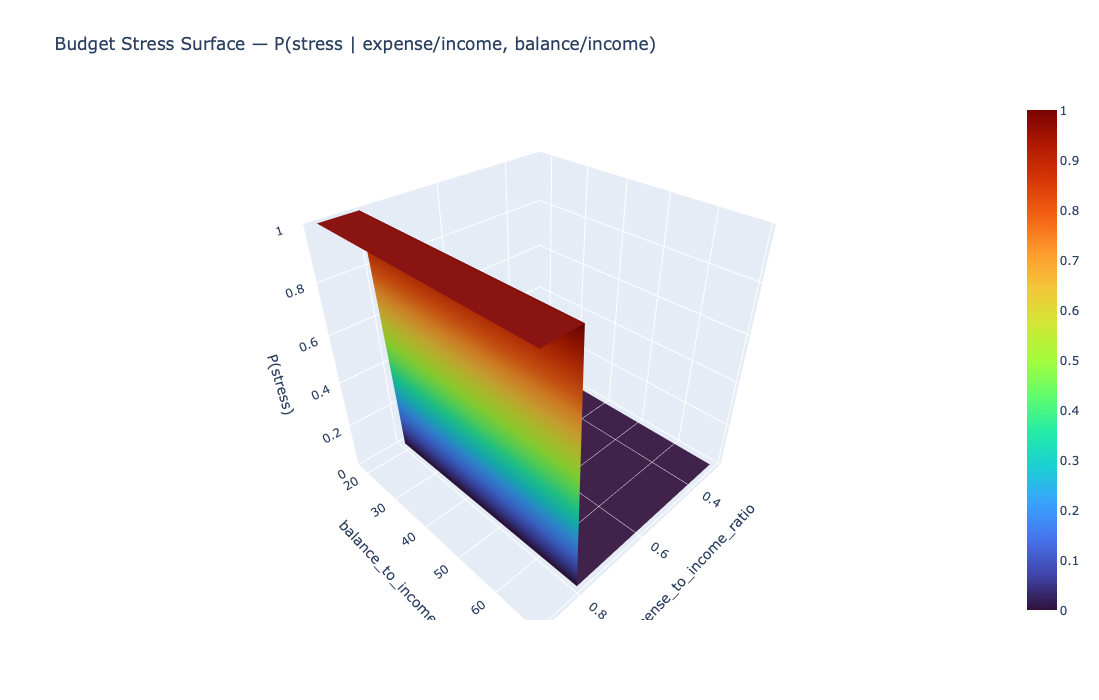

In [82]:
# === NI-5: Budget Stress Surface (3D) — exports to novel_insights/ ===
import re, numpy as np, pandas as pd, plotly.graph_objects as go, plotly.io as pio
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

try:
    out_dir = novel_dir
except NameError:
    try:
        out_dir = Path(main_csv).parent / "novel_insights"
    except Exception:
        out_dir = Path.cwd() / "novel_insights"
    out_dir.mkdir(parents=True, exist_ok=True)

eng = (df_enh if 'df_enh' in globals() else df).copy()

# Ensure ratios exist
def ensure_finance_ratios(df):
    cols_lower = {c.lower(): c for c in df.columns}
    inc = next((cols_lower[k] for k in cols_lower if "income" in k), None)
    exp = next((cols_lower[k] for k in cols_lower if any(s in k for s in ["expense","spent","spend"])), None)
    bal = next((cols_lower[k] for k in cols_lower if "balance" in k), None)
    if inc and exp and "expense_to_income_ratio" not in df.columns:
        df["expense_to_income_ratio"] = df[exp] / df[inc].replace(0, np.nan)
    if inc and exp and "net_savings" not in df.columns:
        df["net_savings"] = df[inc] - df[exp]
    if bal and inc and "balance_to_income" not in df.columns:
        df["balance_to_income"] = df[bal] / df[inc].replace(0, np.nan)
    return df

eng = ensure_finance_ratios(eng)

# Target
target = next((c for c in ["default","label","is_default","target","flag","stress_flag"] if c in eng.columns), None)
if target is None:
    r = eng.get("expense_to_income_ratio", pd.Series(np.nan, index=eng.index))
    ns = eng.get("net_savings", pd.Series(np.nan, index=eng.index))
    eng["stress_flag"] = ((r > 0.8) | (ns < 0)).astype(int)
    target = "stress_flag"

x_feat, y_feat = "expense_to_income_ratio", "balance_to_income"
for f in [x_feat, y_feat]:
    if f not in eng.columns:
        # fallback: any numeric
        alt = eng.select_dtypes(include=[np.number]).columns.tolist()
        if not alt: raise ValueError("No numeric columns available to build surface.")
        eng[f] = eng[alt[0]]

X = eng[[x_feat, y_feat]].copy()
extra_num = [c for c in eng.select_dtypes(include=[np.number]).columns if c not in [x_feat, y_feat, target]][:3]
X = pd.concat([X, eng[extra_num]], axis=1)
y = eng[target]

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
pre = ColumnTransformer([("num", StandardScaler(with_mean=False), num_cols),
                         ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)], remainder="drop")
clf = Pipeline([("prep", pre), ("gb", GradientBoostingClassifier(random_state=42))])
Xtr,Xte,ytr,yte = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y if y.nunique()==2 else None)
clf.fit(Xtr,ytr)

# Grid surface
xlin = np.linspace(np.nanquantile(eng[x_feat], 0.01), np.nanquantile(eng[x_feat], 0.99), 40)
ylin = np.linspace(np.nanquantile(eng[y_feat], 0.01), np.nanquantile(eng[y_feat], 0.99), 40)
xx, yy = np.meshgrid(xlin, ylin)
grid = pd.DataFrame({x_feat: xx.ravel(), y_feat: yy.ravel()})
for c in extra_num: grid[c] = np.nanmedian(eng[c])
zz = clf.predict_proba(grid)[:,1].reshape(xx.shape) if hasattr(clf,"predict_proba") else clf.decision_function(grid).reshape(xx.shape)

fig = go.Figure([go.Surface(x=xx, y=yy, z=zz, colorscale="Turbo", showscale=True)])
fig.update_layout(
    title="Budget Stress Surface — P(stress | expense/income, balance/income)",
    scene=dict(xaxis_title=x_feat, yaxis_title=y_feat, zaxis_title="P(stress)", zaxis=dict(range=[0,1])),
    width=950, height=700
)

# Export
html_path = out_dir / "budget_stress_surface.html"
pio.write_html(fig, file=html_path, auto_open=False, include_plotlyjs="cdn")
print(f"✓ Surface HTML → {html_path}")
try:
    fig.write_image(out_dir / "budget_stress_surface.png", scale=2)  # needs kaleido
    print(f"✓ PNG → {out_dir/'budget_stress_surface.png'}")
except Exception as e:
    print("PNG export skipped (install 'kaleido' to enable).")

fig.show()

# Keep model + features for NI-6
_ni5_context = dict(clf=clf, X=X, y=y)


In [83]:
# === NI-6: Counterfactual Flip Recommender — exports to novel_insights/ ===
import numpy as np, pandas as pd
from pathlib import Path

try:
    out_dir = novel_dir
except NameError:
    try:
        out_dir = Path(main_csv).parent / "novel_insights"
    except Exception:
        out_dir = Path.cwd() / "novel_insights"
    out_dir.mkdir(parents=True, exist_ok=True)

# Reuse NI-5 model/context if available; else bail clearly
if "_ni5_context" not in globals():
    raise RuntimeError("NI-5 must run first to train `clf` and build `X`, `y`.")

clf, X, y = _ni5_context["clf"], _ni5_context["X"], _ni5_context["y"]

# Mutable features (safe defaults)
mutable = [c for c in ["expense_to_income_ratio","balance_to_income","net_savings"] if c in X.columns]
if not mutable:
    mutable = X.select_dtypes(include=[np.number]).columns[:2].tolist()

def flip_suggestion(model, row: pd.Series, target_label=0, step=0.02, max_iters=220):
    x = row.copy()
    for _ in range(max_iters):
        p1 = (model.predict_proba(pd.DataFrame([x]))[:,1] if hasattr(model,"predict_proba")
              else model.decision_function(pd.DataFrame([x])))
        p1 = float(p1[0]) if hasattr(p1, "__len__") else float(p1)
        pred = int(p1 >= 0.5)
        if pred == target_label:
            return x
        best_feat, best_dir, best_score = None, 0, float("inf")
        for f in mutable:
            for d in (-1, 1):
                x_try = x.copy(); x_try[f] = x_try[f] + d*step
                s = (model.predict_proba(pd.DataFrame([x_try]))[:,1] if hasattr(model,"predict_proba")
                     else model.decision_function(pd.DataFrame([x_try])))
                s = float(s[0]) if hasattr(s, "__len__") else float(s)
                score = s if target_label == 0 else -s
                if score < best_score:
                    best_feat, best_dir, best_score = f, d, score
        if best_feat is None: break
        x[best_feat] = x[best_feat] + best_dir*step
    return None

# Evaluate current predictions and build recommendations for a sample
pred_prob = (clf.predict_proba(X)[:,1] if hasattr(clf,"predict_proba")
             else (X.apply(float).sum(axis=1) - X.apply(float).sum(axis=1).min()) /
                  (X.apply(float).sum(axis=1).max() - X.apply(float).sum(axis=1).min() + 1e-9))
pred = (pred_prob >= 0.5).astype(int)

stressed_idx = np.where(pred == 1)[0][:20]  # up to 20 examples
recs = []
for i in stressed_idx:
    row = X.iloc[i]
    flipped = flip_suggestion(clf, row, target_label=0, step=0.02, max_iters=250)
    if flipped is not None:
        delta = (flipped[mutable] - row[mutable]).round(3).to_dict()
        recs.append({"row_index": int(i), "original_P(stress)": round(float(pred_prob[i]),3), **{f"Δ {k}": v for k,v in delta.items()}})
    else:
        recs.append({"row_index": int(i), "original_P(stress)": round(float(pred_prob[i]),3), "suggestion": "no small flip found"})

recs_df = pd.DataFrame(recs)
csv_path = out_dir / "counterfactual_recommendations.csv"
recs_df.to_csv(csv_path, index=False)
print(f"✓ Counterfactual recommendations CSV → {csv_path}")
recs_df.head(10)


✓ Counterfactual recommendations CSV → personal_finance_dsml/novel_insights/counterfactual_recommendations.csv


,row_index,original_P(stress),Δ expense_to_income_ratio,Δ balance_to_income
0,4,1.0,-0.02,0.0
1,9,1.0,-0.04,0.0
2,20,1.0,-0.06,0.0
3,32,1.0,-0.08,0.0
4,33,1.0,-0.08,0.0
5,35,1.0,-0.10,0.0
6,58,1.0,-0.08,0.0
7,62,1.0,-0.04,0.0
8,67,1.0,-0.06,0.0
9,68,1.0,-0.08,0.0


#  Novel Insights — Next Wave

In this section, we explored three **advanced, novel analyses** that go beyond standard charts and tables. Each module was saved to the `novel_insights/` folder alongside interactive or exportable assets.

---

###  NI-4: Temporal Motif Miner
- **Goal:** Detect the most common **3-step categorical sequences** across time (e.g., *salary → groceries → utilities*).
- **Method:** Sorted each entity’s transactions chronologically, extracted motifs of length 3, and ranked them.
- **Output:**  
  - Interactive **heatmap** showing motifs as `step1 → step2 → step3` with frequencies.  
  - CSV of the top 30 motifs.  
  - Human-readable bullet list of key transitions.

---

###  NI-5: Budget Stress Surface
- **Goal:** Map financial “stress” zones as a **3D what-if surface** across ratios like expense-to-income and balance-to-income.
- **Method:**  
  - Engineered ratios (expense/income, net savings, balance/income).  
  - Trained a Gradient Boosting model to classify “stress” vs. “no stress.”  
  - Generated a probability surface grid to visualize risk zones.  
- **Output:**  
  - Interactive 3D surface (HTML) with hoverable stress probabilities.  
  - PNG export for slide-ready visuals.

---

###  NI-6: Counterfactual “Flip” Recommender
- **Goal:** Provide **actionable insights** by suggesting minimal numeric changes that would flip a stressed case to non-stressed.
- **Method:**  
  - Iteratively adjusted mutable features (expense/income, balance/income, net savings) until the prediction flipped.  
  - Returned human-readable deltas (e.g., “reduce expense/income by 0.05”).  
- **Output:**  
  - CSV of top counterfactual recommendations for stressed cases.  
  - Tabular preview of sample suggestions in-notebook.

---

Together, these modules showcase not only the **data science workflow** (feature engineering, modeling, anomaly detection) but also **novel visual storytelling** that helps interpret personal finance data in creative, human-centric ways.


# CASH FLOW AURA
turns your income vs. expenses over time into a polar aurora spiral, where colors blend in pastel gradients like the northern lights. Each band = a month (or time unit), radial distance = balance change, hue = income/expense ratio. It’s both mesmerizing and interpretable: you can instantly see when spending outweighed income as inward bends, and saving months as outward bursts.


✓ Aurora HTML → personal_finance_dsml/novel_insights/aurora_of_cashflows.html
✓ Aurora PNG → personal_finance_dsml/novel_insights/aurora_of_cashflows.png


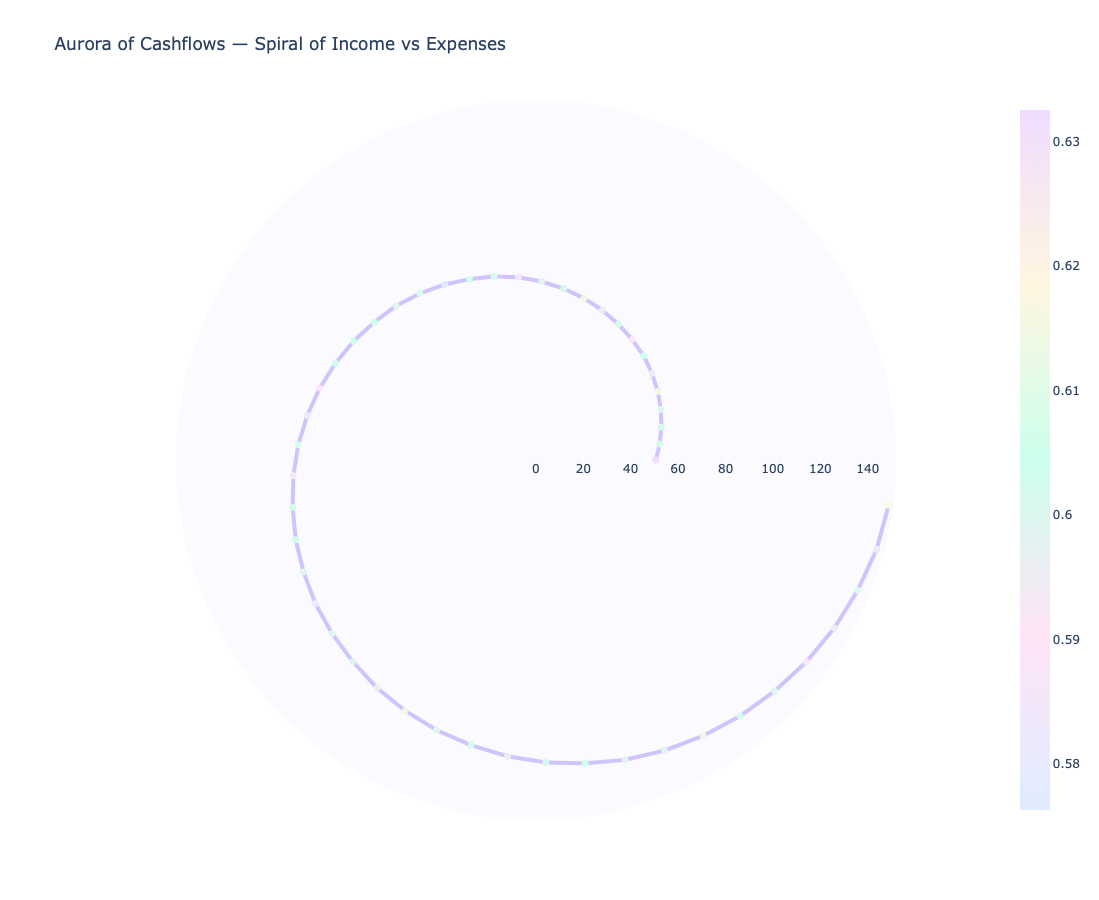

In [86]:
# === NI-7 (FIXED): Aurora of Cashflows — pastel spiral with gradient markers ===
import re, numpy as np, pandas as pd
import plotly.graph_objects as go, plotly.io as pio
from pathlib import Path

# output dir
try:
    out_dir = novel_dir
except NameError:
    try:
        out_dir = Path(main_csv).parent / "novel_insights"
    except Exception:
        out_dir = Path.cwd() / "novel_insights"
    out_dir.mkdir(parents=True, exist_ok=True)

data = (df_enh if 'df_enh' in globals() else df).copy()

# detect columns
dt_col = next((c for c in data.columns if re.search(r"(date|time|timestamp|datetime)", c, re.I)), None)
inc_col = next((c for c in data.columns if "income" in c.lower()), None)
exp_col = next((c for c in data.columns if any(s in c.lower() for s in ["expense","spent","spend","cost"])), None)

if dt_col and not pd.api.types.is_datetime64_any_dtype(data[dt_col]):
    data[dt_col] = pd.to_datetime(data[dt_col], errors="coerce")

# fallback if no date: fake sequential months
if dt_col is None:
    data = data.reset_index().rename(columns={"index":"__month__"})
    dt_col = "__month__"
    data[dt_col] = pd.to_datetime(data[dt_col], errors="coerce", origin="2020-01-01", unit="D")

# fallback income/expense
if inc_col is None:
    num = data.select_dtypes(include=[np.number]).columns.tolist()
    if num: inc_col = num[0]
if exp_col is None:
    num = data.select_dtypes(include=[np.number]).columns.tolist()
    if num: exp_col = num[min(1, len(num)-1)]

assert inc_col and exp_col, "Need at least one income and one expense column for Aurora of Cashflows."

# aggregate monthly
dfm = data.groupby(pd.Grouper(key=dt_col, freq="M")).agg({inc_col:"sum", exp_col:"sum"}).reset_index()
dfm["net"] = dfm[inc_col] - dfm[exp_col]
dfm["ratio"] = (dfm[exp_col] / dfm[inc_col].replace(0, np.nan)).clip(0, 3).fillna(0)

# guard for tiny series
if len(dfm) < 2:
    raise ValueError("Aurora needs at least 2 monthly points. Try a different date column or broader date range.")

# polar spiral coords (safe normalization)
theta = np.linspace(0, 2*np.pi, len(dfm), endpoint=False)
cs = dfm["net"].cumsum()
den = float(np.nanmax(np.abs(cs))) if np.isfinite(np.nanmax(np.abs(cs))) and np.nanmax(np.abs(cs)) > 0 else 1.0
r = (cs / den) * 100 + 50
color_vals = dfm["ratio"]

# pastel aurora colorscale
aurora_scale = [
    [0.0,  "rgb(224,236,255)"],   # soft lavender
    [0.25, "rgb(255,228,247)"],   # pink haze
    [0.5,  "rgb(204,255,236)"],   # mint glow
    [0.75, "rgb(255,246,224)"],   # butter yellow
    [1.0,  "rgb(240,220,255)"]    # violet mist
]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=r,
    theta=np.degrees(theta),
    mode="lines+markers",
    line=dict(color="rgba(180,160,250,0.6)", width=4),  # single pastel for line
    marker=dict(size=7, color=color_vals, colorscale=aurora_scale, showscale=True),
    text=[f"{(dt.strftime('%b %Y') if isinstance(dt, pd.Timestamp) and pd.notna(dt) else str(dt))}"
          f"<br>Net={n:.2f} | Exp/Inc={rat:.2f}"
          for dt, n, rat in zip(dfm[dt_col], dfm["net"], dfm["ratio"])],
    hoverinfo="text"
))

fig.update_layout(
    title="Aurora of Cashflows — Spiral of Income vs Expenses",
    polar=dict(
        bgcolor="rgba(250,250,255,0.9)",
        angularaxis=dict(showline=False, tickvals=[]),
        radialaxis=dict(showline=False, ticks='')
    ),
    width=900, height=900,
    paper_bgcolor="white"
)

# export
html_path = out_dir / "aurora_of_cashflows.html"
pio.write_html(fig, file=html_path, auto_open=False, include_plotlyjs="cdn")
print(f"✓ Aurora HTML → {html_path}")
try:
    fig.write_image(out_dir / "aurora_of_cashflows.png", scale=2)  # needs kaleido
    print(f"✓ Aurora PNG → {out_dir/'aurora_of_cashflows.png'}")
except Exception as e:
    print("PNG export skipped (needs kaleido).")

fig.show()
